![image-4.png](attachment:image-4.png)

# 데이터 분석 3조--------국내 여행 나는 언제가면 좋을까요?

- 김민정, 김형우, 류제범, 변지영, 유호준, 정지현

## 제안 배경 ##

    - 이전에는 해외여행 붐이라고 할 정도로, 많은 사람들이 휴가철에 해외로 나갔으나,
    

![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)


![image.png](attachment:image.png)


    - 지금은 팬데믹 여파에 의해 해외 여행객이 끊임없이 줄어들고 있는 추세다.
    
![image.png](attachment:image.png)

    - 이런 상황 속에서 해외 여행의 대체재로, 여행객들은 국내 여행을 찾고 있고, 이에 대한 수요는 지속적으로 증가하고 있는 상황

    - 우리 조는 실제로 추락하는 해외 여행에 비해 국내 여행이 선전하고 있는지 등을 조사하고, 
    - 흥하고 있는 국내여행이란 트렌드에 맞게 앞으로 국내 여행을 다닐 때, 상황별로 여행지를 추천할 수 있는 프로그램을 만드려 함

## 발표 목차 및 수집 대상 소개

    ① 코로나 전후, 국내여행 변화
        - 현상파악 목적
            **분석 데이터 (KOSIS 월별 국내여행 횟수)
            
    ② Segmentation & Targeting (다양한 측면을 고려해 국민들이 선호하는 여행지 선정)
        - 모든 지역을 조사할 수 없기 때문에, 다양한 변수들을 고려하여 분석 타겟 지역을 선정
            **분석 데이터 (KOSIS 연령별, 소득별, 성별별 방문 여행지)
            
    ③ Focused Analysis
        - 타겟 지역의 다양한 측면을 분석한다.
            ** 분석 데이터 (항공권, 호텔, 렌트카 비수기 성수기 금액을 크롤링)

# 코로나 전후, 국내여행 변화 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from matplotlib import rc
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re # 정규식



# 한글 폰트 처리

from matplotlib import font_manager, rc

# font_path = "./한글폰트.ttf" # 폰트 파일 위치

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
df = pd.read_csv('./data/월별_국내여행_횟수_20220216172617.csv', encoding='cp949')
df.head()

,통계분류(1),통계분류(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,...,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11
0,통계분류(1),통계분류(2),1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,전체,소계,24233,28263,24668,24242,24571,24600,24628,25298,...,12698,16523,19723,19572,21068,19942,18309,18622,16079,16261
2,성별,남자,13019,14868,12768,12099,12607,12600,12887,12791,...,6586,8566,9860,9964,10831,10335,9838,9407,8312,8721
3,성별,여자,11214,13396,11900,12143,11965,12000,11741,12507,...,6111,7957,9863,9608,10237,9607,8471,9215,7767,7540
4,연령,15~19세,1267,1370,1110,1111,1232,1277,1298,1037,...,438,467,740,494,624,645,551,729,365,545


1. 2행부터는 필요없는 데이터이므로 삭제
2. 2~13열:2018데이터, 14~25열: 2019데이터, 26~37열: 2020데이터로 분리
3. 각 데이터들의 타입을 int로 변경
4. 열: 연, 행: 월, 데이터: 여행횟수소계 인 내 데이터프레임 생성

In [ ]:
#2행~ 37행 삭제
for i in range(2,38) :
    df.drop( [i], axis='index', inplace=True)

#연도별로 필요한 데이터값을 가진 시리즈
s_2018 = df.iloc[1, 2:14].astype('int')
s_2019 = df.iloc[1, 14:26].astype('int')
s_2020 = df.iloc[1, 26:38].astype('int')

#연도별로 필요한 데이터값을 가진 리스트
l_2018 = s_2018.tolist()
l_2019 = s_2019.tolist()
l_2020 = s_2020.tolist()

#월이름만 담긴 리스트
months=[ str(x)+'월' for x in range(1,13) ]

#내 데이터프레임 생성
num_of_travel = pd.DataFrame(
    data = {'2018년' : l_2018, '2019년' : l_2019, '2020년' : l_2020},
    index=months
)
num_of_travel

,2018년,2019년,2020년
1월,24233,24442,30775
2월,28263,34251,15627
3월,24668,25368,12698
4월,24242,27897,16523
5월,24571,28575,19723
6월,24600,24443,19572
7월,24628,28943,21068
8월,25298,28682,19942
9월,29371,33033,18309
10월,26051,29748,18622


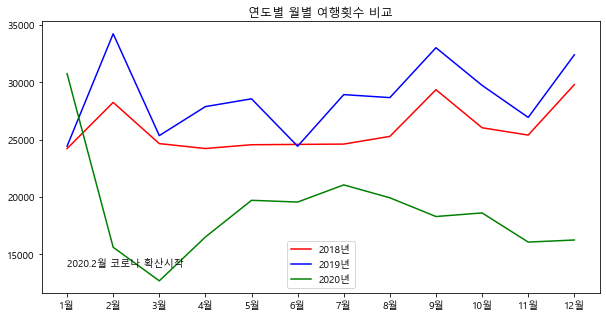

In [ ]:
#연도별 월별 총 여행횟수 그래프화

plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10,5))

plt.title('연도별 월별 여행횟수 비교')

plt.plot(months, l_2018, 'r')
plt.plot(months, l_2019, 'b')
plt.plot(months, l_2020, 'g')

plt.text('1월', 14000, '2020.2월 코로나 확산시작')

plt.legend(labels=['2018년', '2019년', '2020년'], loc='best')
plt. show()

In [ ]:
#월별 여행 감소율 ( 2020값/avg(2019값, 2018값)*100 )
decr_percent=[]
for month in months :
    avg = (num_of_travel.loc[month, '2018년'] + num_of_travel.loc[month, '2019년']) / 2
    decr_percent.append(round(num_of_travel.loc[month, '2020년'] / avg * 100, 2))

for i in range(0, 12) :
    print(months[i], '에는 평년의', decr_percent[i], '% 수준으로 감소했다.')

1월 에는 평년의 126.45 % 수준으로 감소했다.
2월 에는 평년의 50.0 % 수준으로 감소했다.
3월 에는 평년의 50.76 % 수준으로 감소했다.
4월 에는 평년의 63.38 % 수준으로 감소했다.
5월 에는 평년의 74.22 % 수준으로 감소했다.
6월 에는 평년의 79.82 % 수준으로 감소했다.
7월 에는 평년의 78.65 % 수준으로 감소했다.
8월 에는 평년의 73.89 % 수준으로 감소했다.
9월 에는 평년의 58.68 % 수준으로 감소했다.
10월 에는 평년의 66.75 % 수준으로 감소했다.
11월 에는 평년의 61.41 % 수준으로 감소했다.
12월 에는 평년의 52.26 % 수준으로 감소했다.


# Segmentation & Targeting

## 연령 측면 
### 연령별국내 여행 방문지 순위

In [ ]:
df = pd.read_csv('./team/Domestic_travel_by_age.csv', encoding = 'cp949')
# df=pd.read_csv('./data/Domestic_travel_by_age.csv', encoding='utf-8')

In [ ]:
df

,Unnamed: 0,Unnamed: 1,서울,Unnamed: 3,부산,Unnamed: 5,대구,Unnamed: 7,인천,Unnamed: 9,...,전북,Unnamed: 27,전남,Unnamed: 29,경북,Unnamed: 31,경남,Unnamed: 33,제주,Unnamed: 35
0,구분1,구분2,2018.00,2019.00,2018.00,2019.00,2018.00,2019.00,2018.00,2019.00,...,2018.00,2019.00,2018.00,2019.00,2018.00,2019.00,2018.00,2019.00,2018.00,2019.00
1,연령,15~19세,11.03,9.88,8.90,6.32,2.82,3.49,1.54,6.19,...,4.75,7.01,7.75,8.90,8.52,7.85,7.03,7.60,4.69,2.72
2,연령,20대,7.44,12.46,9.52,9.84,2.63,3.07,5.28,5.57,...,6.58,6.91,8.63,7.78,7.33,8.45,7.44,6.35,5.44,5.26
3,연령,30대,6.24,8.28,8.41,6.82,2.77,2.74,3.00,4.80,...,5.79,6.33,9.27,8.57,9.75,9.00,10.20,8.97,5.55,4.85
4,연령,40대,4.76,6.82,7.27,5.83,2.01,2.31,3.44,4.69,...,6.10,7.66,10.95,10.41,12.06,10.10,11.74,9.72,5.54,3.41
5,연령,50대,3.20,6.07,6.42,5.31,2.47,2.33,4.38,4.64,...,7.19,8.46,10.31,10.08,10.49,11.49,12.78,12.01,4.61,4.72
6,연령,60대,3.71,7.40,4.60,4.56,2.09,2.86,4.00,4.94,...,8.03,7.47,11.38,9.82,8.63,10.92,14.03,11.51,4.00,3.81
7,연령,70세이상,3.32,7.91,4.50,3.61,1.26,2.17,4.65,3.51,...,6.82,8.46,10.97,9.83,9.82,10.72,13.47,10.57,4.41,2.75


In [ ]:
# 데이터 전처리
## 0열 삭제
df = df.drop('Unnamed: 0', axis=1)

## 0행 삭제
df = df.drop(0, axis=0)

# 컬렴명 변경
df.columns = ['나이', '서울 2018', '서울 2019', '부산 2018', '부산 2019', '대구 2018', '대구 2019', '인천 2018', '인천 2019', '광주 2018', '광주 2019', '대전 2018', '대전 2019', '울산 2018', '울산 2019', '세종 2018', '세종 2019', '경기 2018', '경기 2019', '강원 2018', '강원 2019', '충북 2018', '충북 2019', '충남 2018', '충남 2019', '전북 2018', '전북 2019', '전남 2018', '전남 2019', '경북 2018', '경북 2019', '경남 2018', '경남 2019', '제주 2018', '제주 2019']
df

,나이,서울 2018,서울 2019,부산 2018,부산 2019,대구 2018,대구 2019,인천 2018,인천 2019,광주 2018,...,전북 2018,전북 2019,전남 2018,전남 2019,경북 2018,경북 2019,경남 2018,경남 2019,제주 2018,제주 2019
1,15~19세,11.03,9.88,8.90,6.32,2.82,3.49,1.54,6.19,1.32,...,4.75,7.01,7.75,8.90,8.52,7.85,7.03,7.60,4.69,2.72
2,20대,7.44,12.46,9.52,9.84,2.63,3.07,5.28,5.57,1.29,...,6.58,6.91,8.63,7.78,7.33,8.45,7.44,6.35,5.44,5.26
3,30대,6.24,8.28,8.41,6.82,2.77,2.74,3.00,4.80,1.47,...,5.79,6.33,9.27,8.57,9.75,9.00,10.20,8.97,5.55,4.85
4,40대,4.76,6.82,7.27,5.83,2.01,2.31,3.44,4.69,1.58,...,6.10,7.66,10.95,10.41,12.06,10.10,11.74,9.72,5.54,3.41
5,50대,3.20,6.07,6.42,5.31,2.47,2.33,4.38,4.64,1.86,...,7.19,8.46,10.31,10.08,10.49,11.49,12.78,12.01,4.61,4.72
6,60대,3.71,7.40,4.60,4.56,2.09,2.86,4.00,4.94,1.17,...,8.03,7.47,11.38,9.82,8.63,10.92,14.03,11.51,4.00,3.81
7,70세이상,3.32,7.91,4.50,3.61,1.26,2.17,4.65,3.51,2.12,...,6.82,8.46,10.97,9.83,9.82,10.72,13.47,10.57,4.41,2.75


#### 2018~2019 데이터 합산하기

In [ ]:
# 합산 시작, 새로운 데이터 프레임 만들어주기
# 컬럼과 로우 생성을 위해 지역명, 나이대 리스트 생성

global_list = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
global_2_list = []
for i in global_list:
    global_2_list.append(i)
    global_2_list.append(i)
    
year = ['a', '15세~19세', '20대', '30대', '40대', '50대', '60대', '70대 이상']

# 2018, 2019 방문객 합산값 저장 리스트 생성
sum_list = []


# 합산 시작, 새로운 데이터 프레임 만들어주기
for i in global_list:
    for j in range(1, 8):
        sum_list.append(df[i + ' 2018'][j] + df[i + ' 2019'][j])

new_df = pd.DataFrame({'서울' : sum_list[0:7],
                       '부산' : sum_list[7:14],
                       '대구' : sum_list[14:21],
                       '인천' : sum_list[21:28],
                       '광주' : sum_list[28:35],
                       '대전' : sum_list[35:42],
                       '울산' : sum_list[42:49],
                       '세종' : sum_list[49:56],
                       '경기' : sum_list[56:63],
                       '강원' : sum_list[63:70],
                       '충북' : sum_list[70:77],
                       '충남' : sum_list[77:84],
                       '전북' : sum_list[84:91],
                       '전남' : sum_list[91:98],
                       '경북' : sum_list[98:105],
                       '경남' : sum_list[105:112],
                       '제주' : sum_list[112:119]},
                     index = year[1:])

new_df

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
15세~19세,20.91,15.22,6.31,7.73,3.44,6.05,3.40,0.96,37.70,22.48,5.95,13.85,11.76,16.65,16.37,14.63,7.41
20대,19.90,19.36,5.70,10.85,2.70,5.53,3.43,1.04,35.05,33.18,6.27,14.81,13.49,16.41,15.78,13.79,10.70
30대,14.52,15.23,5.51,7.80,3.24,7.63,4.00,2.08,34.82,33.71,7.39,17.35,12.12,17.84,18.75,19.17,10.40
40대,11.58,13.10,4.32,8.13,3.14,6.68,3.41,1.78,29.13,30.66,9.39,19.78,13.76,21.36,22.16,21.46,8.95
50대,9.27,11.73,4.80,9.02,3.71,5.62,2.34,1.16,25.36,28.00,12.13,19.67,15.65,20.39,21.98,24.79,9.33
60대,11.11,9.16,4.95,8.94,2.86,5.49,2.91,1.08,28.71,23.28,11.11,21.41,15.50,21.20,19.55,25.54,7.81
70대 이상,11.23,8.11,3.43,8.16,3.47,4.59,3.64,0.85,30.70,21.38,9.42,19.68,15.28,20.80,20.54,24.04,7.16


In [ ]:
# 새로 만든 데이터 프레임에서 다시 지역별로 방문객을 합산하여 가장 많이 방문한 지역은 어디인지 도출

for i in global_list:
        print(i, '총 방문객 :', new_df[i].sum())

서울 총 방문객 : 98.52
부산 총 방문객 : 91.91
대구 총 방문객 : 35.019999999999996
인천 총 방문객 : 60.629999999999995
광주 총 방문객 : 22.56
대전 총 방문객 : 41.59
울산 총 방문객 : 23.13
세종 총 방문객 : 8.950000000000001
경기 총 방문객 : 221.47
강원 총 방문객 : 192.69
충북 총 방문객 : 61.66
충남 총 방문객 : 126.55000000000001
전북 총 방문객 : 97.56
전남 총 방문객 : 134.65
경북 총 방문객 : 135.13
경남 총 방문객 : 143.42
제주 총 방문객 : 61.75999999999999


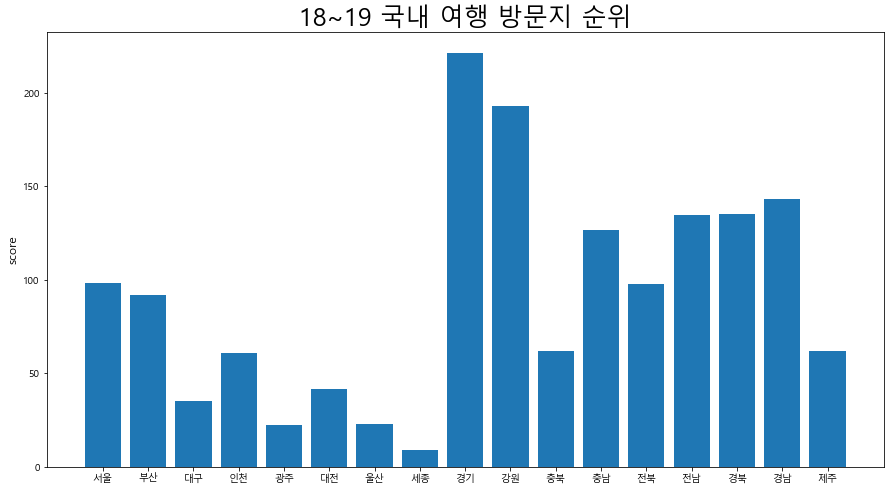

In [ ]:
a = []
for i in global_list:
        a.append(new_df[i].sum())

a.sort()

# 그래프에 넣을 변수 생성
x = []
y = []
for i in global_list:
    x.append(i)
for i in global_list:
    y.append(new_df[i].sum())

# 그래프 만들자..
plt.bar(x, y)

plt.title('18~19 국내 여행 방문지 순위', fontsize = 25)
plt.ylabel('score', fontsize = 12)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()


- 지역별 여행객 방문 순위

 1위 : 경기

 2위 : 강원

 3위 : 경남

 ...
 
 10위 : 제주도

### 지역별 최대 방문객 나이대

In [ ]:
# 지역별로 어떤 나이대가 방문을 많이 할까?

global_list = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
rank_list = []

# 가장 많이 방문하는 연령대 리스트에 넣기

for i in global_list:
    rank_list.append(new_df[i].max())

    # 연령대 리스트와 연령대 정보 대입시키기

for i in global_list:
    for j in range(0, 17):
        for z in range(0, 1):
            if rank_list[j] == new_df[i][0]:
                print(f'{i}의 최대 방문객은 15~19세이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][1]:
                print(f'{i}의 최대 방문객은 20대이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][2]:
                print(f'{i}의 최대 방문객은 30대이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][3]:
                print(f'{i}의 최대 방문객은 40대이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][4]:
                print(f'{i}의 최대 방문객은 50대이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][5]:
                print(f'{i}의 최대 방문객은 60대이며, 수치는 {rank_list[j]}입니다.')
                
            elif rank_list[j] == new_df[i][6]:
                print(f'{i}의 최대 방문객은 70대 이상이며, 수치는 {rank_list[j]}입니다.')

서울의 최대 방문객은 15~19세이며, 수치는 20.91입니다.
부산의 최대 방문객은 20대이며, 수치는 19.36입니다.
대구의 최대 방문객은 15~19세이며, 수치는 6.3100000000000005입니다.
인천의 최대 방문객은 20대이며, 수치는 10.850000000000001입니다.
광주의 최대 방문객은 50대이며, 수치는 3.71입니다.
대전의 최대 방문객은 30대이며, 수치는 7.630000000000001입니다.
울산의 최대 방문객은 30대이며, 수치는 4.0입니다.
세종의 최대 방문객은 30대이며, 수치는 2.08입니다.
경기의 최대 방문객은 15~19세이며, 수치는 37.7입니다.
강원의 최대 방문객은 30대이며, 수치는 33.71입니다.
충북의 최대 방문객은 50대이며, 수치는 12.129999999999999입니다.
충남의 최대 방문객은 60대이며, 수치는 21.41입니다.
전북의 최대 방문객은 50대이며, 수치는 15.650000000000002입니다.
전남의 최대 방문객은 40대이며, 수치는 21.36입니다.
경북의 최대 방문객은 40대이며, 수치는 22.16입니다.
경남의 최대 방문객은 60대이며, 수치는 25.54입니다.
제주의 최대 방문객은 20대이며, 수치는 10.7입니다.


- 분석

지역별 최다 방문 연령  1. 경기 (15~19대)  2. 강원 (30대)  3. 경남 (60대)    ...    10. 제주 (20대)


## 소득 측면

### 소득별 국내 여행 방문지 순위

In [ ]:
# '소득별_국내여행방문지' 데이터 불러오기
df=pd.read_csv('./team/소득별_국내여행방문지.csv', encoding='utf-8')

# 컬렴명 변경
df.columns = ['구분1','구분2','서울 2018','서울 2019','부산 2018','부산 2019',
'대구 2018','대구 2019', '인천 2018', '인천 2019', '광주 2018', '광주 2019', 
'대전 2018', '대전 2019', '울산 2018', '울산 2019', '세종 2018', '세종 2019', 
'경기 2018', '경기 2019', '강원 2018', '강원 2019', '충북 2018', '충북 2019', 
'충남 2018', '충남 2019', '전북 2018', '전북 2019', '전남 2018', '전남 2019', 
'경북 2018', '경북 2019', '경남 2018', '경남 2019', '제주 2018', '제주 2019']

# 0행 삭제
df = df.drop(0, axis=0)

# 행/열 변환
df.transpose()
df=df.T
df

,1,2,3,4,5,6,7,8,9
구분1,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득
구분2,100만원미만,100~200만원미만,200~300만원미만,300~400만원미만,400~500만원미만,500~600만원미만,600만원이상,무응답,전체
서울 2018,7.0,3.93,5.11,4.41,5.16,6.92,4.42,5.59,5.21
서울 2019,8.6,6.84,7.81,8.33,8.19,7.87,9.07,0.0,8.16
부산 2018,3.33,4.48,5.53,7.24,8.99,6.29,8.55,10.86,7.2
부산 2019,4.77,4.1,6.2,6.52,6.72,6.16,6.72,0.0,6.26
대구 2018,4.67,2.1,2.54,2.31,2.54,2.31,1.81,2.07,2.33
대구 2019,4.03,3.35,2.7,2.81,2.18,2.38,2.66,0.0,2.63
인천 2018,2.64,2.89,3.94,3.36,4.2,3.98,4.66,0.0,3.91
인천 2019,3.27,4.95,4.64,4.2,4.94,5.11,5.83,0.0,4.85


In [ ]:
# 2018년 데이터 추출
df_2018=df.loc[['구분1','구분2','서울 2018','부산 2018','대구 2018','인천 2018',
'광주 2018','대전 2018','울산 2018','세종 2018','경기 2018','강원 2018',
'충북 2018','충남 2018','전북 2018','전남 2018','경북 2018','경남 2018','제주 2018']]

# 2019년 데이터 추출
df_2019=df.loc[['구분1','구분2','서울 2019','부산 2019','대구 2019','인천 2019',
'광주 2019','대전 2019','울산 2019','세종 2019','경기 2019','강원 2019',
'충북 2019','충남 2019','전북 2019','전남 2019','경북 2019','경남 2019','제주 2019']]

In [ ]:
# 2018년 가구소득 전체
df_2018_all=df_2018.loc[:,9]
df_2018_all.iloc[2:]

서울 2018     5.21
부산 2018      7.2
대구 2018     2.33
인천 2018     3.91
광주 2018     1.55
대전 2018     3.15
울산 2018     1.39
세종 2018     0.54
경기 2018    13.47
강원 2018    15.42
충북 2018     4.23
충남 2018      9.0
전북 2018     6.56
전남 2018    10.05
경북 2018     9.81
경남 2018    11.17
제주 2018     5.02
Name: 9, dtype: object

In [ ]:
# 2019 가구소득 전체
df_2019_all=df_2019.loc[:,9]
df_2019_all.iloc[2:]

서울 2019     8.16
부산 2019     6.26
대구 2019     2.63
인천 2019     4.85
광주 2019     1.66
대전 2019     2.97
울산 2019     1.88
세종 2019     0.86
경기 2019    17.38
강원 2019    13.64
충북 2019     4.88
충남 2019     9.41
전북 2019     7.46
전남 2019     9.38
경북 2019     9.95
경남 2019     9.67
제주 2019     4.21
Name: 9, dtype: object

- 시각화

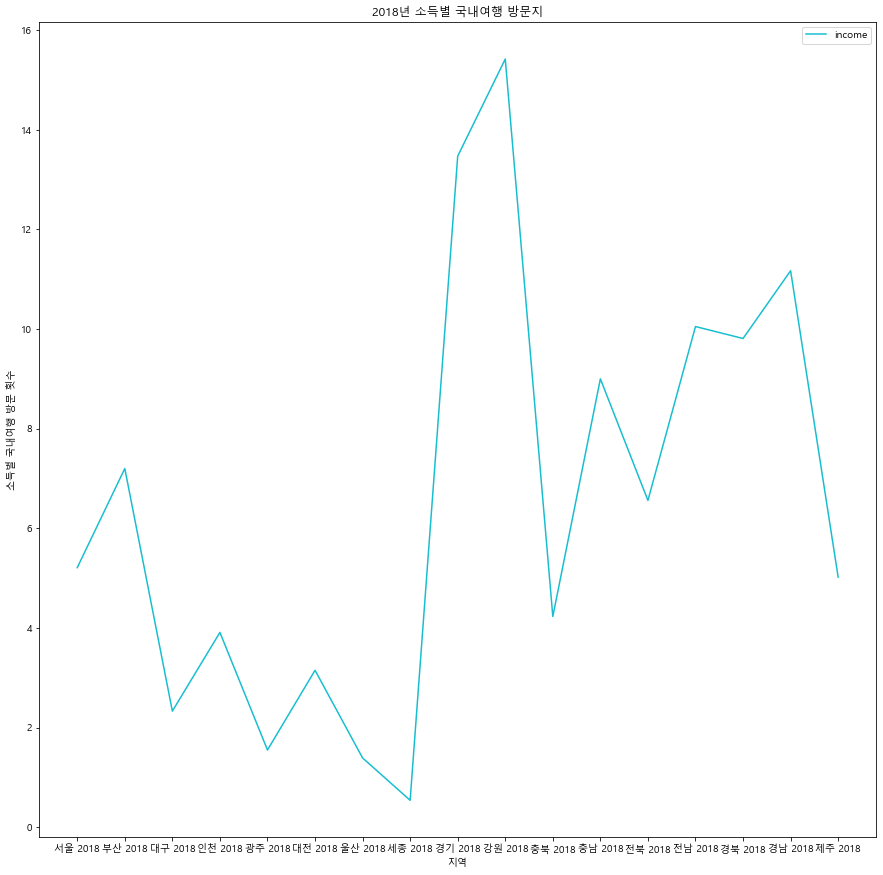

In [ ]:
plt.plot(['서울 2018','부산 2018','대구 2018','인천 2018',
'광주 2018','대전 2018','울산 2018','세종 2018','경기 2018','강원 2018',
'충북 2018','충남 2018','전북 2018','전남 2018','경북 2018','경남 2018','제주 2018'],
[5.21,7.2,2.33,3.91,1.55,3.15,1.39,0.54,13.47,15.42,4.23,9.0,6.56,10.05,9.81,11.17,5.02],
color='#17becf',
label='income')

plt.legend()

plt.xlabel('지역')
plt.ylabel('소득별 국내여행 방문 횟수')

plt.title('2018년 소득별 국내여행 방문지')

plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams['lines.linewidth']=4

plt.show()

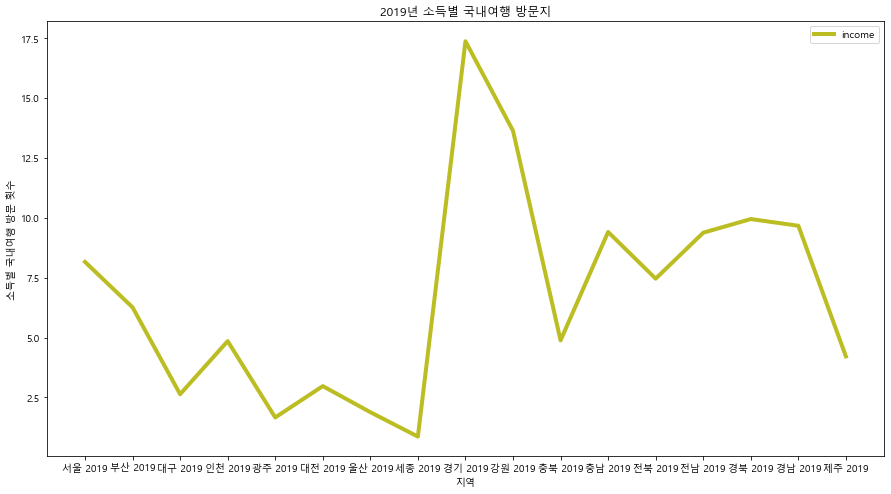

In [ ]:
plt.plot(['서울 2019','부산 2019','대구 2019','인천 2019',
'광주 2019','대전 2019','울산 2019','세종 2019','경기 2019','강원 2019',
'충북 2019','충남 2019','전북 2019','전남 2019','경북 2019','경남 2019','제주 2019'],
[8.16,6.26,2.63,4.85,1.66,2.97,1.88,0.86,17.38,13.64,4.88,9.41,7.46,9.38,9.95,9.67,4.21],
color='#bcbd22',
label='income')

plt.legend()

plt.xlabel('지역')
plt.ylabel('소득별 국내여행 방문 횟수')

plt.title('2019년 소득별 국내여행 방문지')

plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams['lines.linewidth']=4

plt.show()

소득별 국내 여행방문지 

- 2018  1. 강원  2. 경기  3. 경남  ... 10. 제주도

- 2019  1. 경기 2. 강원  3. 경북  ... 11. 제주도

### 소득별 주요 교통 수단

In [ ]:
# '소득별_주요교통수단' 데이터 불러오기
df2=pd.read_csv('./team/소득별_주요교통수단.csv', encoding='utf-8')

# 컬렴명 변경
df2.columns = ['구분1','구분2','자가용 2018','자가용 2019','철도 2018','철도 2019', '항공기 2018','항공기 2019', 
'선박/해상교통 2018', '선박/해상교통 2019', '지하철 2018', '지하철 2019', '고속/시외/시내버스 2018', '고속/시외/시내버스 2019',
'전세/관광버스 2018', '전세/관광버스 2019', '차량대여/렌트 2018', '차량대여/렌트 2019', '자전거 2018', '자전거 2019', 
'택시 2018', '택시 2019', '기타 2018', '기타 2019']

# 0행 삭제
df2 = df2.drop(0, axis=0)

# 행/열 변환
df2.transpose()
df2=df2.T
df2

,1,2,3,4,5,6,7,8,9
구분1,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득
구분2,100만원미만,100~200만원미만,200~300만원미만,300~400만원미만,400~500만원미만,500~600만원미만,600만원이상,무응답,전체
자가용 2018,59.31,72.35,77.72,77.9,76.83,72.18,72.75,54.13,74.79
자가용 2019,61.13,70.64,78.61,80.32,79.86,80.58,78.78,0.0,78.56
철도 2018,8.23,5.93,6.76,7.58,7.42,9.0,11.28,4.55,8.29
철도 2019,9.75,8.33,7.43,7.33,8.27,8.67,9.16,0.0,8.22
항공기 2018,3.04,4.24,4.75,5.99,5.69,5.71,8.03,6.01,5.92
항공기 2019,3.89,3.27,3.79,4.24,4.89,4.83,5.48,0.0,4.55
선박/해상교통 2018,0.94,0.53,1.94,2.19,2.33,1.74,3.4,1.1,2.18
선박/해상교통 2019,2.85,2.13,2.05,2.59,3.12,3.46,3.84,0.0,2.97


In [ ]:
# 2018년 데이터 추출
df2_2018=df2.loc[['구분1','구분2','자가용 2018','철도 2018', '항공기 2018',
'선박/해상교통 2018', '지하철 2018', '고속/시외/시내버스 2018',
'전세/관광버스 2018', '차량대여/렌트 2018', '자전거 2018', '택시 2018', '기타 2018']]

# 2019년 데이터 추출
df2_2019=df2.loc[['구분1','구분2','자가용 2019','철도 2019','항공기 2019', 
'선박/해상교통 2019', '지하철 2019','고속/시외/시내버스 2019','전세/관광버스 2019', 
'차량대여/렌트 2019', '자전거 2019', '택시 2019', '기타 2019']]

In [ ]:
# 2018년 가구소득 전체
df2_2018_all=df2_2018.loc[:,9]
df2_2018_all.iloc[2:]

자가용 2018           74.79
철도 2018             8.29
항공기 2018            5.92
선박/해상교통 2018        2.18
지하철 2018            5.26
고속/시외/시내버스 2018     8.64
전세/관광버스 2018        6.14
차량대여/렌트 2018         9.6
자전거 2018            0.42
택시 2018             3.31
기타 2018             0.03
Name: 9, dtype: object

In [ ]:
# 2019 가구소득 전체
df2_2019_all=df2_2019.loc[:,9]
df2_2019_all.iloc[2:]

자가용 2019           78.56
철도 2019             8.22
항공기 2019            4.55
선박/해상교통 2019        2.97
지하철 2019            5.75
고속/시외/시내버스 2019     8.01
전세/관광버스 2019        5.06
차량대여/렌트 2019        4.38
자전거 2019            0.16
택시 2019             3.18
기타 2019             0.25
Name: 9, dtype: object

- 시각화

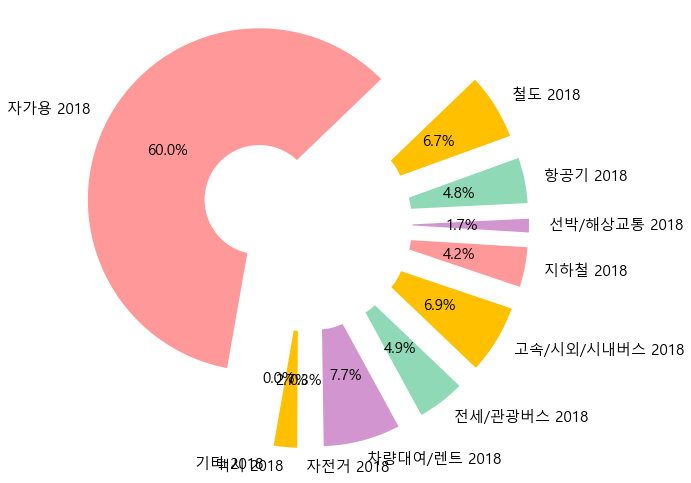

In [ ]:
# 2018년 소득별 주요 교통수단
ratio=[74.79,8.29,5.92,2.18,5.26,8.64,6.14,9.6,0.42,3.31,0.03]
labels=['자가용 2018','철도 2018', '항공기 2018',
'선박/해상교통 2018', '지하철 2018', '고속/시외/시내버스 2018',
'전세/관광버스 2018', '차량대여/렌트 2018', '자전거 2018', '택시 2018', '기타 2018']

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode= [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams["font.size"]=15

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.show()


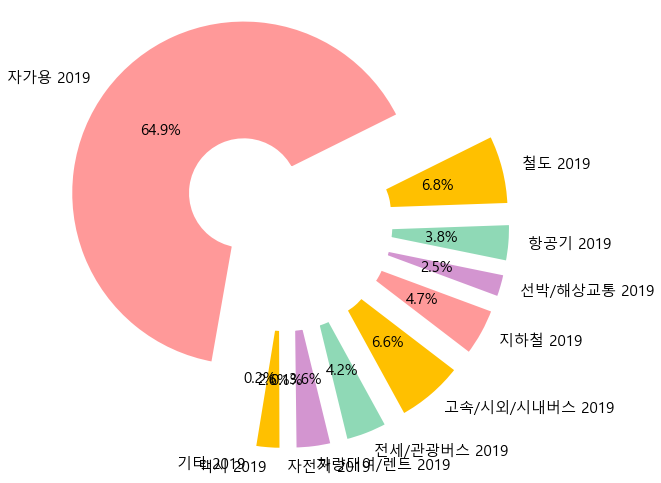

In [ ]:
# 2019년 소득별 주요 교통수단
ratio=[78.56,8.22,4.55,2.97,5.75,8.01,5.06,4.38,0.16,3.18,0.25]
labels=['자가용 2019','철도 2019', '항공기 2019',
'선박/해상교통 2019', '지하철 2019', '고속/시외/시내버스 2019',
'전세/관광버스 2019', '차량대여/렌트 2019', '자전거 2019', '택시 2019', '기타 2019']

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode= [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams["font.size"]=15

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.show()

- 데이터 분석

소득별 주요 교통수단 

- 2018 1. 자가용  2. 철도  3. 항공기

- 2019 1. 자가용  2. 철도  3. 항공기

### 소득별 주요 숙박 시설

In [ ]:
# '소득별_주요숙박시설' 데이터 불러오기
df3=pd.read_csv('./team/소득별_주요숙박시설.csv', encoding='utf-8')

# 컬렴명 변경
df3.columns = ['구분1','구분2','야영 2018','야영 2019','호텔 2018','호텔 2019',
'모텔/여관 2018','모텔/여관 2019', '펜션 2018', '펜션 2019','콘도미니엄/리조트 2018',
'콘도미니엄/리조트 2019','유스호스텔 2018','유스호스텔 2019','연수원/수련원 2018','연수원/수련원 2019',
'전통한옥숙박시설 2018','전통한옥숙박시설 2019','게스트하우스 2018','게스트하우스 2019',
'민박(도시형/농촌형) 2018','자연휴양림내숙박시설 2018','자연휴양림내숙박시설 2019',
'가족/친지집 2018','가족/친지집 2019','무박여행 2018','무박여행 2019','기타 2018','기타 2019','민박 2019']

# 0행 삭제
df3 = df3.drop(0, axis=0)

# 행/열 변환
df3.transpose()
df3=df3.T
df3

,1,2,3,4,5,6,7,8,9
구분1,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득,가구소득
구분2,100만원미만,100~200만원미만,200~300만원미만,300~400만원미만,400~500만원미만,500~600만원미만,600만원이상,무응답,전체
야영 2018,2.87,0.51,2.61,1.93,2.78,2.19,4.07,0.0,2.62
야영 2019,0.58,3.01,2.76,2.58,2.73,3.1,3.2,0.0,2.81
호텔 2018,5.81,9.73,8.99,10.25,11.91,10.1,11.88,14.32,10.72
호텔 2019,9.5,7.97,9.69,11.98,10.07,10.13,12.86,0.0,10.77
모텔/여관 2018,14.73,7.25,12.53,11.54,9.83,11.59,11.52,2.96,11.09
모텔/여관 2019,9.13,8.94,13.07,9.25,9.51,9.11,10.8,0.0,9.99
펜션 2018,31.04,29.1,32.72,34.64,33.07,34.52,34.07,41.17,33.71
펜션 2019,21.43,28.62,30.9,30.31,30.33,33.56,32.65,0.0,31.08


In [ ]:
# 2018년 데이터 추출
df3_2018=df3.loc[['구분1','구분2','야영 2018','호텔 2018',
'모텔/여관 2018', '펜션 2018','콘도미니엄/리조트 2018',
'유스호스텔 2018','연수원/수련원 2018',
'전통한옥숙박시설 2018','게스트하우스 2018',
'민박(도시형/농촌형) 2018','자연휴양림내숙박시설 2018',
'가족/친지집 2018','무박여행 2018','기타 2018']]

# 2019년 데이터 추출
df3_2019=df3.loc[['구분1','구분2','야영 2019','호텔 2019',
'모텔/여관 2019','펜션 2019','콘도미니엄/리조트 2019','유스호스텔 2019','연수원/수련원 2019',
'전통한옥숙박시설 2019','게스트하우스 2019','자연휴양림내숙박시설 2019',
'가족/친지집 2019','무박여행 2019','기타 2019','민박 2019']]

In [ ]:
# 2018년 가구소득 전체
df3_2018_all=df3_2018.loc[:,9]
df3_2018_all.iloc[2:]

야영 2018              2.62
호텔 2018             10.72
모텔/여관 2018          11.09
펜션 2018             33.71
콘도미니엄/리조트 2018      15.97
유스호스텔 2018            1.0
연수원/수련원 2018         0.67
전통한옥숙박시설 2018        1.94
게스트하우스 2018          2.55
민박(도시형/농촌형) 2018     4.89
자연휴양림내숙박시설 2018      2.96
가족/친지집 2018         13.09
무박여행 2018            1.28
기타 2018               0.7
Name: 9, dtype: object

In [ ]:
# 2019 가구소득 전체
df3_2019_all=df3_2019.loc[:,9]
df3_2019_all.iloc[2:]

야영 2019             2.81
호텔 2019            10.77
모텔/여관 2019          9.99
펜션 2019            31.08
콘도미니엄/리조트 2019     14.29
유스호스텔 2019          1.48
연수원/수련원 2019        1.06
전통한옥숙박시설 2019       1.42
게스트하우스 2019          2.3
자연휴양림내숙박시설 2019     2.35
가족/친지집 2019        17.93
무박여행 2019           0.85
기타 2019             1.16
민박 2019             3.62
Name: 9, dtype: object

- 시각화

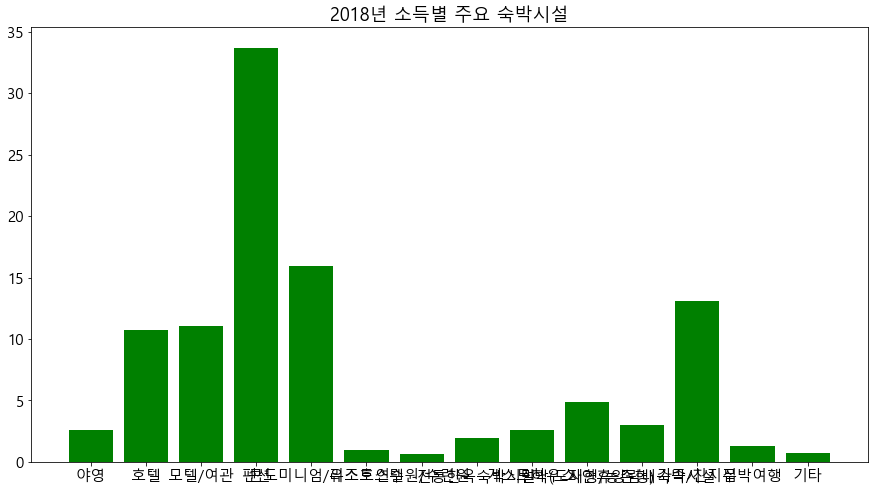

In [ ]:
years=['야영','호텔','모텔/여관', '펜션','콘도미니엄/리조트',
'유스호스텔','연수원/수련원','전통한옥숙박시설','게스트하우스',
'민박(도시형/농촌형)','자연휴양림내숙박시설','가족/친지집','무박여행','기타']
values=[2.62,10.72,11.09,33.71,15.97,1.0,0.67,1.94,2.55,4.89,2.96,13.09,1.28,0.7]

plt.bar(years,values, color='green')

plt.title("2018년 소득별 주요 숙박시설")
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams["font.size"]=10

plt.show()

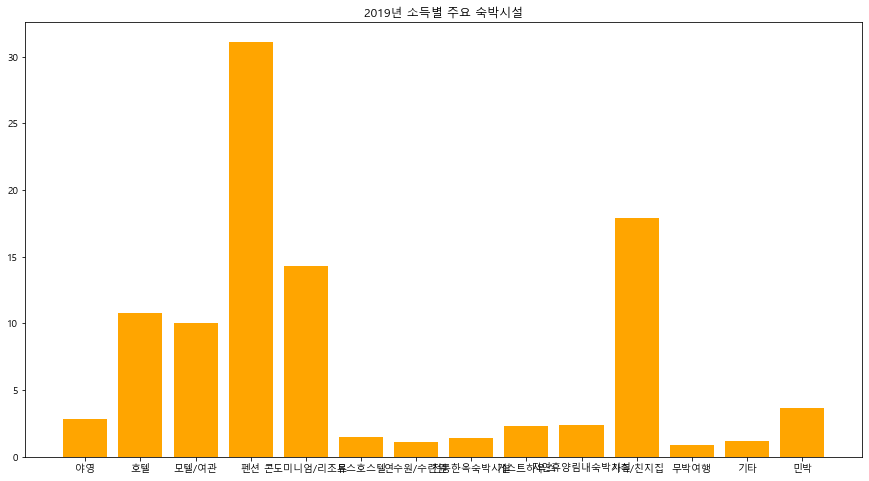

In [ ]:
years=['야영','호텔','모텔/여관','펜션','콘도미니엄/리조트','유스호스텔','연수원/수련원',
'전통한옥숙박시설','게스트하우스','자연휴양림내숙박시설','가족/친지집','무박여행','기타','민박']
values=[2.81,10.77,9.99,31.08,14.29,1.48,1.06,1.42,2.3,2.35,17.93,0.85,1.16,3.62]

plt.bar(years,values, color='orange')

plt.title("2019년 소득별 주요 숙박시설")
plt.rcParams["figure.figsize"]=(15,8)
plt.rcParams["font.size"]=10

plt.show()

소득별 주요 숙박시설 

- 2018 1. 펜션  2. 콘도/리조트  3. 가족/친지집   4. 호텔

- 2019 1. 펜션  2. 가족/친지집  3. 콘도/리조트   4. 호텔

- 소득별 최종 분석 결과

  제주도를 1위라 예상하고 데이터를 분석했으나 여행이라는 테마 안에 짧은 시간이라도 자신의 거주 지역을 벗어나 놀러간 경우, 친적/본가에 간 경우 모두 여행에 포함되어 예상과는 조금 다른 결과를 나타냈음을 알 수 있었습니다. 여행방문지의 경우, 강원/경기가 수도와 비교적 가까워 1,2위로 나타난 것으로 알 수 있었습니다.

## 성별 측면

### 남여별 여행 방문지 순위

In [ ]:
# 연도별로 나눠진 데이터 불러오기

df18 = pd.read_csv("./team/2018_korea.csv", encoding='cp949')
df19 = pd.read_csv("./team/2019_korea.csv", encoding='cp949')
df20 = pd.read_csv("./team/2020_korea.csv", encoding='cp949')

# 연도별로 나눠진 데이터 불러오기

# df18=pd.read_csv('C:/Users/82108/Desktop/PYTHON_CODE/k-digital training/데이터분석/teamproject/data/2018_korea.csv', encoding='utf-8')
# df18=pd.read_csv('C:/Users/82108/Desktop/PYTHON_CODE/k-digital training/데이터분석/teamproject/data/2019_korea.csv', encoding='utf-8')
# df18=pd.read_csv('C:/Users/82108/Desktop/PYTHON_CODE/k-digital training/데이터분석/teamproject/data/2020_korea.csv', encoding='utf-8')


In [ ]:
# 파일명 가져오기
path = './team'
# path ='C:/Users/82108/Desktop/PYTHON_CODE/k-digital training/데이터분석/teamproject/data'
allFiles = glob.glob(path + "/20**_korea.csv")

# 파일명에서 년도 추출하는 사용자함수

def extract_year(string):
    match = re.match(".+(\d{4})", string)
    if match != None: return match.group(1)

# 파일 합치고, 연도 column 추가하기

frame = pd.DataFrame()
df_list= []

for file_ in allFiles:
    df = pd.read_csv(file_, index_col=None, header=0, encoding='cp949')
    df.columns = map(str.lower, df.columns)
    df["연도"] = extract_year(file_)
    df_list.append(df)

# 파일 합친 후 확인

df = pd.concat(df_list)
df = df.rename(columns={"통계분류(1)": "분류1", "통계분류(2)": "분류2"})    #column명 변경

df

,분류1,분류2,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,연도
0,전체,소계,23789,41779,10612,16043,7700,14484,6541,2358,54612,87796,19749,41618,29163,52273,50035,53874,45440,2018
1,성별,남자,12299,21048,5866,7982,4378,7097,3452,1395,28930,45903,10465,20534,14349,26601,25073,28012,22159,2018
2,성별,여자,11490,20731,4746,8062,3322,7387,3090,964,25682,41893,9283,21084,14813,25672,24962,25862,23281,2018
3,연령,15~19세,2315,2471,612,310,325,819,287,59,4143,3293,675,1442,1162,1942,2142,1519,2485,2018
4,연령,20대,5504,8636,1770,2970,942,1533,1278,151,9768,16762,1870,5828,4740,7188,6104,6042,8172,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,가구소득,300~400만원 미만,3653,3650,1501,2353,974,1824,1468,700,10960,7198,3240,6412,5348,7402,5993,9304,5171,2020
33,가구소득,400~500만원 미만,3324,3938,914,2388,910,1220,1169,670,11285,8716,3611,7351,5189,6689,4952,6946,5848,2020
34,가구소득,500~600만원 미만,3101,3064,614,2911,776,1554,1054,384,11466,8904,2941,5599,3747,5234,4435,5302,5192,2020
35,가구소득,600만원 이상,3332,3507,928,2240,473,1452,904,607,11538,12352,2852,5766,3684,4864,4574,4340,6381,2020


In [ ]:
# 연도별로 성별 정보만 추출한 데이터프레임 생성

sex_2018 = df[df["연도"]=='2018'].iloc[1:3, 1:]
sex_2019 = df[df["연도"]=='2019'].iloc[1:3, 1:]
sex_2020 = df[df["연도"]=='2020'].iloc[1:3, 1:]

sex = pd.concat([sex_2018, sex_2019, sex_2020], axis = 0)    #생성한 데이터프레임 합치기

sex.iloc[:, 1:] = sex.iloc[:, 1:].astype('int')    # 성별 제외한 모든 column 데이터타입 int로 변환

sex = sex.rename(columns={"분류2":"성별"})     # column명 변경
sex

,성별,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,연도
1,남자,12299,21048,5866,7982,4378,7097,3452,1395,28930,45903,10465,20534,14349,26601,25073,28012,22159,2018
2,여자,11490,20731,4746,8062,3322,7387,3090,964,25682,41893,9283,21084,14813,25672,24962,25862,23281,2018
1,남자,16797,18309,7286,10594,4330,8222,4791,2173,35114,40866,13709,24171,18329,24296,24184,24033,17948,2019
2,여자,18293,17101,6268,10783,4500,6597,4280,1697,36385,39805,11027,22017,19305,23894,25528,23799,21363,2019
1,남자,8945,8663,2591,6172,2182,4337,3402,1885,28722,21234,7849,16005,11391,15576,13533,16918,10813,2020
2,여자,7467,8654,2755,5809,2217,3824,2393,1198,27397,21280,7683,14437,10716,15068,11714,16062,14132,2020


In [ ]:
# 남녀 수 리스트 정의

man_2018 = []
woman_2018 = []

man_2019 = []
woman_2019 = []

man_2020 = []
woman_2020 = []


# 연도별 남녀 수 리스트 생성 함수

def mklist(list, index):
    for i in range(1,18):
         list.append(sex.iloc[index, i])

            
# 연도별 남녀 수 리스트 생성

mklist(man_2018, 0)
mklist(woman_2018, 1)

mklist(man_2019, 2)
mklist(woman_2019, 3)

mklist(man_2020, 4)
mklist(woman_2020, 5)


# 생성된 리스트 확인

print(man_2018)
print(woman_2018)
print('')

print(man_2019)
print(woman_2019)
print('')

print(man_2020)
print(woman_2020)
print('')

[12299, 21048, 5866, 7982, 4378, 7097, 3452, 1395, 28930, 45903, 10465, 20534, 14349, 26601, 25073, 28012, 22159]
[11490, 20731, 4746, 8062, 3322, 7387, 3090, 964, 25682, 41893, 9283, 21084, 14813, 25672, 24962, 25862, 23281]

[16797, 18309, 7286, 10594, 4330, 8222, 4791, 2173, 35114, 40866, 13709, 24171, 18329, 24296, 24184, 24033, 17948]
[18293, 17101, 6268, 10783, 4500, 6597, 4280, 1697, 36385, 39805, 11027, 22017, 19305, 23894, 25528, 23799, 21363]

[8945, 8663, 2591, 6172, 2182, 4337, 3402, 1885, 28722, 21234, 7849, 16005, 11391, 15576, 13533, 16918, 10813]
[7467, 8654, 2755, 5809, 2217, 3824, 2393, 1198, 27397, 21280, 7683, 14437, 10716, 15068, 11714, 16062, 14132]



## 총 분석 ##

- 연령, 성별, 소득 별로 가장 많이 방문하는 여행지는 공통적으로 강원, 경기 지역이었으며, 제주도는 10위권을 기록


- 기존 데이터셋은 친척집 방문 등의 요소가 반영되어 있었다. 때문에 '여행'만을 목적으로 하는 데이터셋을 다시 찾아 분석해 보았다.

In [ ]:
# 원자료는 50711행*2107열=106848077값이어서 필요없는 열 삭제 & 열이름변경 & 데이터타입변경 후 수정된 csv파일을 가져옴
# 분석이 복잡해져서 여행의 첫번째 방문장소만 여행목적지로 취급

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from matplotlib import rc
import numpy as np


df1 = pd.read_csv('./data/2019년 국민여행조사_국내여행_수정.csv', encoding='cp949')
df1.head()


,ID,SYEAR,SMONTH,SDAY,EYEAR,EMONTH,EDAY,SPOT,SYEAR.1,SMONTH.1,...,EDAY.6,SPOT.6,SYEAR.7,SMONTH.7,SDAY.7,EYEAR.7,EMONTH.7,EDAY.7,SPOT.7,Unnamed: 57
0,11010550341_1000000,2018,12,31,2019,1,1,21090,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN
1,11010550341_1000005,2019,1,18,2019,1,20,36460,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN
2,11010550341_1000007,2019,1,1,2019,1,3,21090,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN
3,11010550341_1000012,2019,1,25,2019,1,27,31370,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN
4,11010550341_1000013,2019,1,10,2019,1,13,39020,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN


In [ ]:
# 원자료는 50711행*2107열=106848077값이어서 필요없는 열 삭제 & 열이름변경 & 데이터타입변경 후 수정된 csv파일을 가져옴
# 분석이 복잡해져서 여행의 첫번째 방문장소만 여행목적지로 취급
df2 = pd.read_csv('./data/2020년 국민여행조사_국내여행_수정.csv', encoding='cp949')
df2.head()

,ID,SYEAR,SMONTH,SDAY,EYEAR,EMONTH,EDAY,SPOT,SYEAR.1,SMONTH.1,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,11010530201_1,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010530201_10,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010530201_17,2020,1,24,2020,1,25,32010,#NULL!,#NULL!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010530201_2,2020,1,24,2020,1,25,24020,#NULL!,#NULL!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010530201_22,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2019년, 2020년 데이터를 한 프레임으로 합치지는 않음
1. 1열 id는 필요없으므로 삭제, 마지막쯔음에 모든 값이 NaN인 빈 열 삭제
2. 시작일과 끝일이 같이 필요하지도 않고 분석에 혼란을 야기하기에 끝일 삭제
3. SYEAR데이터는 모두 같으므로, SDAY 데이터는 너무 복잡해지므로 삭제
4. 열 : [첫번째 여행 시작월, 첫번째 여행 도시, 두번째 여행 시작월, 두번째 여행 도시, ...], 행:방문객인 중간 데이터프레임 생성
5. 1,2열:첫번째 여행, 3,4열: 두번째 여행, ... 으로 분리
6. 모든값이 '#NULL!'인 여행(여행안감)을 삭제
7. SPOT 시군구코드와 시군구명을 대조하여 지역코드를 지역명으로 변경
8. 열: 여행시작 월, 행: 지역명, 데이터: 여행횟수, 정렬:월 인 피봇테이블 생성

In [ ]:
#빈 열 삭제
df1.info() #마지막 57번째 열만 모든행이 NaN값임
df1.drop('Unnamed: 57', axis=1, inplace=True)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48269 entries, 0 to 48268
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           48269 non-null  object 
 1   SYEAR        48269 non-null  object 
 2   SMONTH       48269 non-null  object 
 3   SDAY         48269 non-null  object 
 4   EYEAR        48269 non-null  object 
 5   EMONTH       48269 non-null  object 
 6   EDAY         48269 non-null  object 
 7   SPOT         48269 non-null  object 
 8   SYEAR.1      48269 non-null  object 
 9   SMONTH.1     48269 non-null  object 
 10  SDAY.1       48269 non-null  object 
 11  EYEAR.1      48269 non-null  object 
 12  EMONTH.1     48269 non-null  object 
 13  EDAY.1       48269 non-null  object 
 14  SPOT.1       48269 non-null  object 
 15  SYEAR.2      48269 non-null  object 
 16  SMONTH.2     48269 non-null  object 
 17  SDAY.2       48269 non-null  object 
 18  EYEAR.2      48269 non-null  object 
 19  EMON

,ID,SYEAR,SMONTH,SDAY,EYEAR,EMONTH,EDAY,SPOT,SYEAR.1,SMONTH.1,...,EMONTH.6,EDAY.6,SPOT.6,SYEAR.7,SMONTH.7,SDAY.7,EYEAR.7,EMONTH.7,EDAY.7,SPOT.7
0,11010550341_1000000,2018,12,31,2019,1,1,21090,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
1,11010550341_1000005,2019,1,18,2019,1,20,36460,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
2,11010550341_1000007,2019,1,1,2019,1,3,21090,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
3,11010550341_1000012,2019,1,25,2019,1,27,31370,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
4,11010550341_1000013,2019,1,10,2019,1,13,39020,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


In [ ]:
#빈 열 삭제
df2.info() #마지막 36~118번째 열의 모든행이 NaN값임
for i in range(36, 119) :
    df2.drop('Unnamed: '+str(i), axis=1, inplace=True)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50710 entries, 0 to 50709
Columns: 119 entries, ID to Unnamed: 118
dtypes: float64(83), object(36)
memory usage: 46.0+ MB


,ID,SYEAR,SMONTH,SDAY,EYEAR,EMONTH,EDAY,SPOT,SYEAR.1,SMONTH.1,...,EMONTH.3,EDAY.3,SPOT.3,SYEAR.4,SMONTH.4,SDAY.4,EYEAR.4,EMONTH.4,EDAY.4,SPOT.4
0,11010530201_1,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
1,11010530201_10,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
2,11010530201_17,2020,1,24,2020,1,25,32010,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
3,11010530201_2,2020,1,24,2020,1,25,24020,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
4,11010530201_22,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


2019년 데이터 : 조사대상 48269명, 1인 최대 여행횟수 8회<br>
2020년 데이터 : 조사대상 50710명, 1인 최대 여행횟수 5회

In [ ]:
#id열 삭제
df1.drop('ID', axis=1, inplace=True)
df2.drop('ID', axis=1, inplace=True)

#SYEAR, SDAY, EYEAR, EMONTH, EDAY 열 삭제
#7개의 열이 하나의 여행을 의미 >> 7x, 7x+2, 7x+3, 7x+4, 7x+5열 삭제 >> 7x+1, 7x+6열만 남김

x = []
for i in range(8) :     # 2019년 데이터는 1인 최대 여행횟수 8회
    x.append(7*i+1)     # SMONTH열 (7x+1번째)의 인덱스 리스트 x에 추가
    x.append(7*i+6)     # SPOT열 (7x+6번째)의 인덱스 리스트 x에 추가

df1 = df1.iloc[:, x]    # x리스트에 포함된 인덱스의 데이터만 df1에 담기
df1.head()

x = []
for i in range(5) :     #2020년 데이터는 1인 최대 여행횟수 5회
    x.append(7*i+1)     # SMONTH열 (7x+1번째)의 인덱스 리스트 x에 추가
    x.append(7*i+6)     # SPOT열 (7x+6번째)의 인덱스 리스트 x에 추가

df2 = df2.iloc[:, x]    # x리스트에 포함된 인덱스의 데이터만 df2에 담기
df2.head()

,SMONTH,SPOT,SMONTH.1,SPOT.1,SMONTH.2,SPOT.2,SMONTH.3,SPOT.3,SMONTH.4,SPOT.4
0,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
1,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
2,1,32010,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
3,1,24020,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
4,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


In [ ]:
#여행 별로 나눈 새로운 데이터프레임 생성
df3 = pd.DataFrame(index=range(0,3), columns=['MONTH', 'SPOT'])     #빈 데이터프레임 생성

for i in range(8) :     # 2019년 데이터는 1인 최대 여행횟수 8회
    each_travel = df1.iloc[:, 2*i:2*i+2]        #2열씩 잘라서 each_travel에 담기
    each_travel.columns=['MONTH', 'SPOT']       #each_travel의 열 이름을 동일하게 지정
    df3 = pd.concat([df3, each_travel], axis=0, ignore_index=True)  #생성한 빈 데이터프레임에 연결

df3.drop([0, 1, 2], axis=0, inplace=True)       # 처음에 선언한 빈 데이터 값 지우기
df3.head()


,MONTH,SPOT
3,12,21090
4,1,36460
5,1,21090
6,1,31370
7,1,39020


In [ ]:
#여행 별로 나눈 새로운 데이터프레임 생성
df4 = pd.DataFrame(index=range(0,3), columns=['MONTH', 'SPOT'])     #빈 데이터프레임 생성

for i in range(5) :     # 2020년 데이터는 1인 최대 여행횟수 5회
    each_travel = df2.iloc[:, 2*i:2*i+2]         #2열씩 잘라서 each_travel에 담기
    each_travel.columns=['MONTH', 'SPOT']        #each_travel의 열 이름을 동일하게 지정
    df4 = pd.concat([df4, each_travel], axis=0, ignore_index=True)

df4.drop([0, 1, 2], axis=0, inplace=True)       # 처음에 선언한 빈 데이터 값 지우기
df4.head()

,MONTH,SPOT
3,#NULL!,#NULL!
4,#NULL!,#NULL!
5,1,32010
6,1,24020
7,#NULL!,#NULL!


In [ ]:
#NULL! 데이터 삭제
nonull = df3[(df3.MONTH == '#NULL!') & (df3.SPOT == '#NULL!')].index
df3.drop(nonull, inplace=True)

nonull = df4[(df4.MONTH == '#NULL!') & (df4.SPOT == '#NULL!')].index
df4.drop(nonull, inplace=True)


2019년 데이터 : 386152행 >> 31119행<br>
2020년 데이터 : 253550행 >> 21217행

In [ ]:
#시군구코드와 시군구 명칭이 저장된 csv파일 불러오기
adm = pd.read_csv('./data/법무부_대국민포털 행정구역 분류 정보_20201231.csv', encoding='cp949')
adm.head()

,행정구역분류코드,행정구역분류대분류번호,행정구역분류대분류명,행정구역분류중분류번호,행정구역분류중분류명
0,11000,11,서울특별시,,NaN
1,11010,11,서울특별시,10,종로구
2,11020,11,서울특별시,20,중구
3,11030,11,서울특별시,30,용산구
4,11040,11,서울특별시,40,성동구


1. 필요없는 '행정구역분류대분류번호', '행정구역분류중분류번호' 열 제거
2. 3,5번째 열의 데이터를 연결한 하나의 열 추가
3. '행정구역분류대분류명', '행정구역분류중분류명' 열 제거
4. 열 이름 변경
5. NaN값 제거 (대분류값만 가져서 해당 지역 없음)

In [ ]:
#2, 4열 제거
adm.drop(['행정구역분류대분류번호', '행정구역분류중분류번호'], axis=1, inplace=True)

#3,5번째 열을 합쳐서 새로운 열 만들기
adm['NAME']=adm['행정구역분류대분류명'] + ' ' + adm['행정구역분류중분류명']

#2, 3열 제거
adm.drop([ '행정구역분류대분류명', '행정구역분류중분류명'], axis=1, inplace=True)

#열 이름 변경 (merge를 쉽게 하기 위해)
adm.columns = ['SPOT', 'NAME']

#NaN값 제거
adm.dropna(axis=0, how='any', inplace=True)

adm

,SPOT,NAME
1,11010,서울특별시 종로구
2,11020,서울특별시 중구
3,11030,서울특별시 용산구
4,11040,서울특별시 성동구
5,11050,서울특별시 광진구
...,...,...
272,38380,경상남도 함양군
273,38390,경상남도 거창군
274,38400,경상남도 합천군
276,39010,제주특별자치도 제주시


In [ ]:
#df3, df4의 모든 데이터타입 str >> int
df3['SPOT']=df3['SPOT'].astype(int)     
df3['MONTH'] = df3['MONTH'].astype(int)
df4['SPOT']=df4['SPOT'].astype(int)
df4['MONTH'] = df4['MONTH'].astype(int)

#spot열의 같은 값을 기준으로 merge
final_2019 = df3.merge(right=adm, how='inner', suffixes=('_',''))
final_2020 = df4.merge(right=adm, how='inner', suffixes=('_',''))

final_2019.head(), final_2020.head()

(   MONTH   SPOT        NAME
 0     12  21090  부산광역시 해운대구
 1      1  21090  부산광역시 해운대구
 2      7  21090  부산광역시 해운대구
 3      1  21090  부산광역시 해운대구
 4      6  21090  부산광역시 해운대구,
    MONTH   SPOT     NAME
 0      1  32010  강원도 춘천시
 1      9  32010  강원도 춘천시
 2     10  32010  강원도 춘천시
 3      4  32010  강원도 춘천시
 4      7  32010  강원도 춘천시)

In [ ]:
final_2019.info(), final_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31116 entries, 0 to 31115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MONTH   31116 non-null  int32 
 1   SPOT    31116 non-null  int32 
 2   NAME    31116 non-null  object
dtypes: int32(2), object(1)
memory usage: 729.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21217 entries, 0 to 21216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MONTH   21217 non-null  int32 
 1   SPOT    21217 non-null  int32 
 2   NAME    21217 non-null  object
dtypes: int32(2), object(1)
memory usage: 497.3+ KB


(None, None)

2019년 데이터 : 자세한 방문지역없이 25000(대전광역시)으로만 기록된 데이터가 있어 3행 제거, 총 31116 행 <br>
2020년 데이터 : 모두 자세한 지역이 기록되어 있어 총 21217행

In [ ]:
#8. 열: 여행시작 월, 행: 지역명, 데이터: 여행횟수, 정렬:지역명 인 피봇테이블 생성
pivot_2019 = pd.pivot_table(final_2019, index="NAME", columns="MONTH", aggfunc='count',sort=True)     #열: 여행시작 월, 행: 지역명, 데이터: 여행횟수 인 피봇테이블 생성
pivot_2020 = pd.pivot_table(final_2020, index="NAME", columns="MONTH", aggfunc='count',sort=True)     #열: 여행시작 월, 행: 지역명, 데이터: 여행횟수 인 피봇테이블 생성

#아무도 여행을 가지 않아 나오는 결측치 = 0으로 대체
pivot_2019 = pivot_2019.fillna(0)
pivot_2020 = pivot_2020.fillna(0)

pivot_2020

SPOT                                                              \
MONTH       1     2     3     4     5     6     7     8     9     10    11   
NAME                                                                         
강원도 강릉시   58.0  13.0  10.0  15.0  28.0  36.0  59.0  54.0  36.0  31.0  27.0   
강원도 고성군    4.0   5.0   2.0   1.0   2.0   3.0   4.0   1.0   3.0   3.0   3.0   
강원도 동해시   15.0   3.0   4.0   4.0   2.0   4.0   7.0  10.0   2.0   3.0   4.0   
강원도 삼척시    9.0   4.0   5.0   2.0   5.0   8.0   8.0   9.0   2.0   4.0   1.0   
강원도 속초시   34.0  13.0  12.0  14.0  20.0  22.0  40.0  49.0  25.0  19.0  24.0   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
충청북도 제천시  12.0   9.0   5.0   8.0  10.0  11.0  19.0  19.0   8.0  14.0   4.0   
충청북도 증평군   4.0   3.0   2.0   3.0   7.0   0.0   0.0   1.0   2.0   2.0   2.0   
충청북도 진천군  14.0   1.0   2.0   3.0  10.0   1.0   3.0   6.0   7.0   5.0   8.0   
충청북도 청주시  43.0  18.0  11.0  22.0  16.0  16.0   9.0  14.0  17.0  29.0  15.0   
충청북도 충주시  17.0   6.0   2.0   6.0   8.0  17.0   7.0  15.0   7.0  21.0  11.0   

                
MONTH       12  
NAME            
강원도 강릉시   34.0  
강원도 고성군    3.0  
강원도 동해시    8.0  
강원도 삼척시    7.0  
강원도 속초시   30.0  
...        ...  
충청북도 제천시  10.0  
충청북도 증평군   3.0  
충청북도 진천군   3.0  
충청북도 청주시  18.0  
충청북도 충주시  13.0  

[229 rows x 12 columns]

- 시도 별 총 방문객수 바그래프

In [ ]:
#마지막열에 총 방문횟수 열 추가
pivot_2019['TOTAL'] = 0
pivot_2020['TOTAL'] = 0
for i in range(12) :
    pivot_2019['TOTAL'] = pivot_2019['TOTAL'] + pivot_2019[('SPOT', i+1)]
    pivot_2020['TOTAL'] = pivot_2020['TOTAL'] + pivot_2020[('SPOT', i+1)]

#총 방문횟수를 기준으로 정렬
sort_2019 = pivot_2019.sort_values(by='TOTAL', ascending=False)
sort_2020 = pivot_2020.sort_values(by='TOTAL', ascending=False)

In [ ]:
#2019년 연간 총 방문횟수 상위 10개 구
top_2019 = sort_2019.head(10)
top_2019

SPOT                                                        \
MONTH            1     2     3     4     5     6     7     8     9    10   
NAME                                                                       
경상북도 경주시      66.0  60.0  75.0  95.0  71.0  67.0  65.0  65.0  69.0  70.0   
부산광역시 해운대구    84.0  72.0  64.0  68.0  58.0  57.0  75.0  91.0  36.0  56.0   
제주특별자치도 서귀포시  75.0  68.0  69.0  78.0  78.0  49.0  68.0  60.0  52.0  69.0   
전라남도 여수시      60.0  63.0  51.0  74.0  55.0  55.0  57.0  68.0  36.0  61.0   
강원도 속초시       55.0  49.0  56.0  61.0  47.0  38.0  77.0  86.0  33.0  63.0   
강원도 강릉시       73.0  50.0  39.0  39.0  51.0  37.0  67.0  68.0  30.0  47.0   
전라북도 전주시      42.0  49.0  49.0  39.0  45.0  45.0  38.0  35.0  43.0  43.0   
경상북도 포항시      46.0  37.0  35.0  24.0  39.0  40.0  29.0  51.0  35.0  37.0   
제주특별자치도 제주시   27.0  38.0  45.0  40.0  38.0  34.0  46.0  41.0  34.0  43.0   
충청남도 보령시      28.0  34.0  34.0  25.0  36.0  22.0  77.0  85.0  30.0  32.0   

                          TOTAL  
MONTH           11    12         
NAME                             
경상북도 경주시      70.0  65.0  838.0  
부산광역시 해운대구    52.0  61.0  774.0  
제주특별자치도 서귀포시  56.0  51.0  773.0  
전라남도 여수시      47.0  55.0  682.0  
강원도 속초시       47.0  67.0  679.0  
강원도 강릉시       45.0  83.0  629.0  
전라북도 전주시      48.0  44.0  520.0  
경상북도 포항시      39.0  54.0  466.0  
제주특별자치도 제주시   39.0  40.0  465.0  
충청남도 보령시      22.0  38.0  463.0

In [ ]:
#2020년 연간 총 방문횟수 상위 10개 구
top_2020 = sort_2020.head(10)
top_2020

SPOT                                                        \
MONTH            1     2     3     4     5     6     7     8     9    10   
NAME                                                                       
제주특별자치도 서귀포시  52.0  29.0  22.0  29.0  40.0  44.0  49.0  43.0  35.0  50.0   
경상북도 경주시      47.0  36.0  20.0  26.0  35.0  44.0  48.0  43.0  34.0  37.0   
강원도 강릉시       58.0  13.0  10.0  15.0  28.0  36.0  59.0  54.0  36.0  31.0   
제주특별자치도 제주시   44.0  22.0  15.0  22.0  26.0  28.0  34.0  41.0  29.0  31.0   
부산광역시 해운대구    52.0  27.0  12.0  21.0  24.0  29.0  49.0  35.0  24.0  23.0   
경상북도 포항시      43.0  27.0   6.0  19.0  20.0  25.0  39.0  34.0  30.0  34.0   
충청남도 보령시      44.0  27.0  11.0  12.0  16.0  23.0  55.0  58.0  22.0  18.0   
경기도 가평군       17.0  24.0  23.0  31.0  33.0  36.0  34.0  30.0  34.0  28.0   
전라북도 전주시      42.0  32.0  24.0  16.0  20.0  24.0  30.0  37.0  29.0  19.0   
강원도 속초시       34.0  13.0  12.0  14.0  20.0  22.0  40.0  49.0  25.0  19.0   

                          TOTAL  
MONTH           11    12         
NAME                             
제주특별자치도 서귀포시  31.0  30.0  454.0  
경상북도 경주시      36.0  42.0  448.0  
강원도 강릉시       27.0  34.0  401.0  
제주특별자치도 제주시   36.0  28.0  356.0  
부산광역시 해운대구    23.0  27.0  346.0  
경상북도 포항시      34.0  33.0  344.0  
충청남도 보령시      25.0  26.0  337.0  
경기도 가평군       25.0  14.0  329.0  
전라북도 전주시      20.0  29.0  322.0  
강원도 속초시       24.0  30.0  302.0

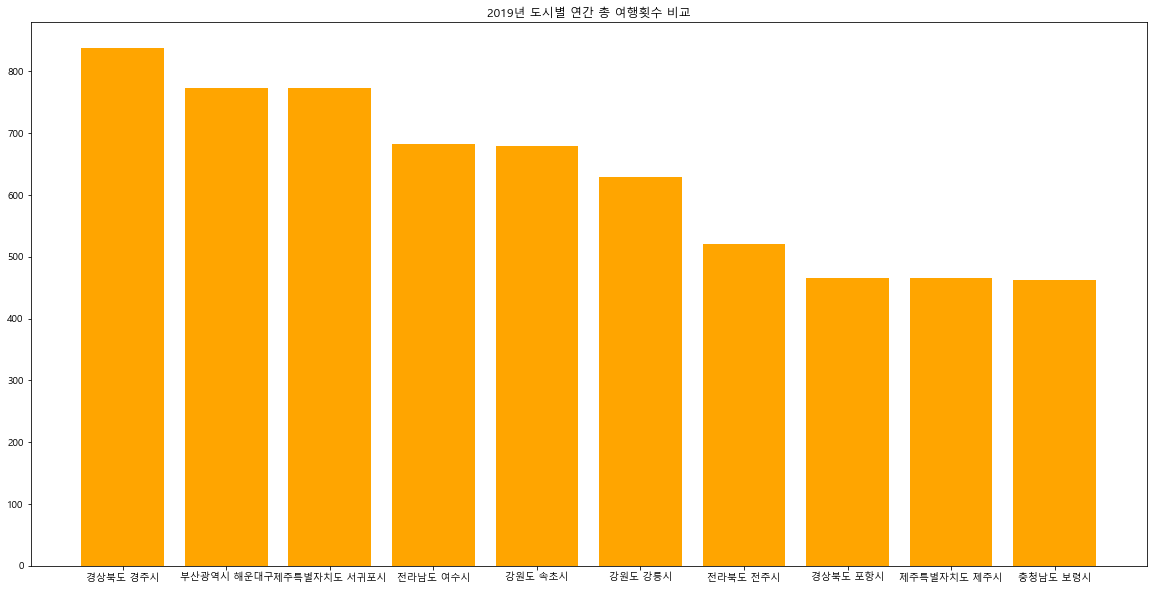

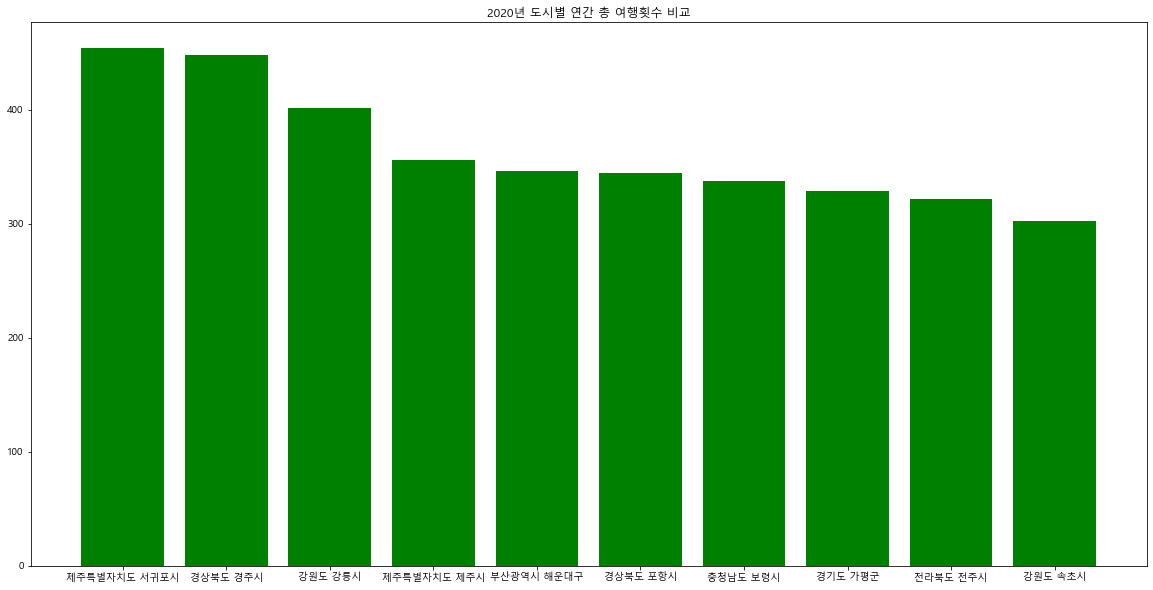

In [ ]:
#2019년
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(20,10))
plt.title('2019년 도시별 연간 총 여행횟수 비교')
plt.bar(top_2019.index, top_2019['TOTAL'].tolist(), color = 'orange')
plt. show()

#2020년
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(20,10))
plt.title('2020년 도시별 연간 총 여행횟수 비교')
plt.bar(top_2020.index, top_2020['TOTAL'].tolist(), color = 'green')
plt. show()


#### 분석결과
- 2019년의 상위 여행지는 경주-부산-제주서귀포-여수-속초이다.
- 2020년의 상위 여행지는 제주서귀포-경주-강릉-제주제주시-부산이다.
- 2020년에는 코로나19로 인해 최대여행지인 제주 서귀포의 여행횟수가 2019년의 10위였던 보령시의 방문횟수보다도 적다.
- 2019년의 인기여행지 10위의 방문횟수는 1위의 55% 수준임에 반해 2020년에는 67%로 여행 편중현상이 완화되었다.

- 두 해 모두 top 10에 들어간 지역에 대해 연별 월별 관광객 비교

In [ ]:
#2019년의 여수시, 2020년의 가평군 제외 9개의 여행지가 양 해에 걸쳐 높은 순위를 보임
toplist=[]
for i in range(10):
    toplist.append(top_2019.index[i])   #2019년의 top10 데이터를 toplist에 담기
toplist.remove('전라남도 여수시')   #2020년에는 없는 여수시 제거
toplist.sort()  #정렬

print(toplist)

['강원도 강릉시', '강원도 속초시', '경상북도 경주시', '경상북도 포항시', '부산광역시 해운대구', '전라북도 전주시', '제주특별자치도 서귀포시', '제주특별자치도 제주시', '충청남도 보령시']


In [ ]:
#열 수를 맞춰주기 위해 이전에 계산했던 total 열 삭제
pivot_2019.drop('TOTAL', axis=1, inplace=True)
pivot_2020.drop('TOTAL', axis=1, inplace=True)

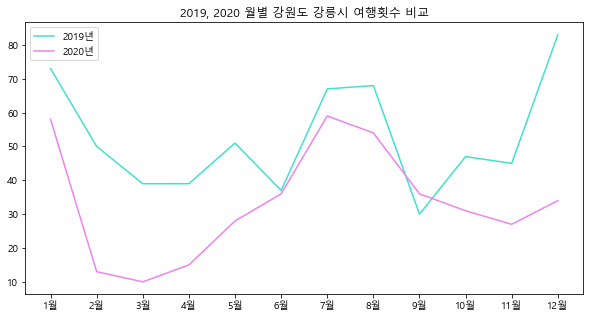

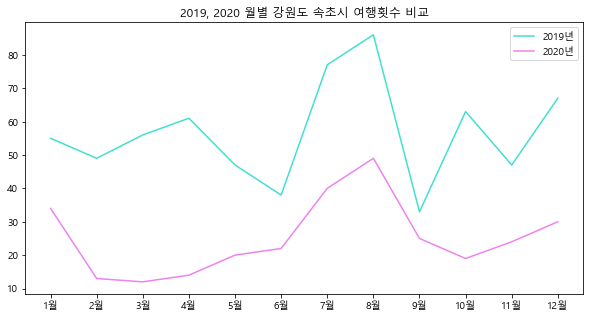

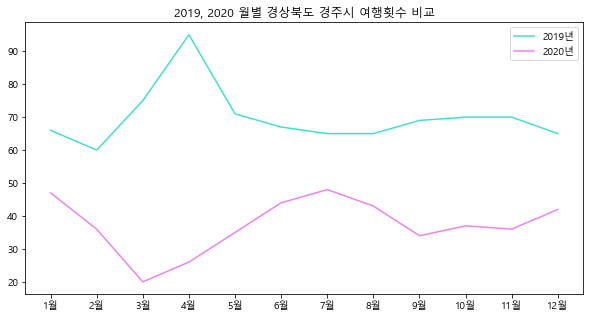

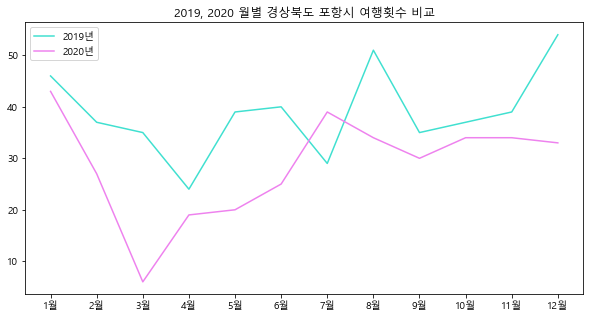

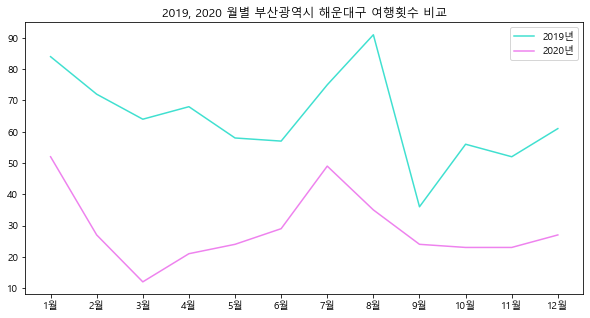

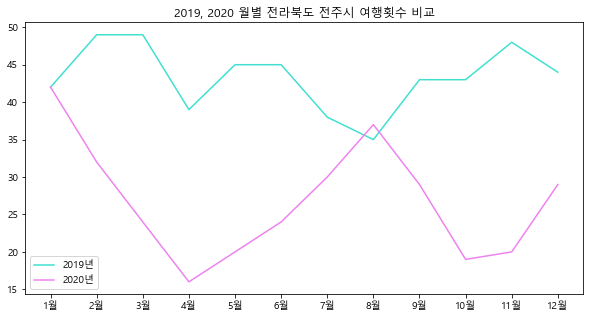

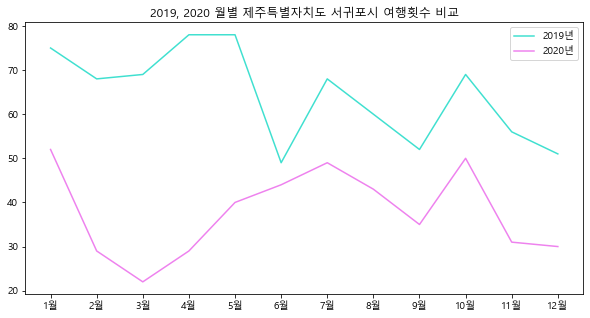

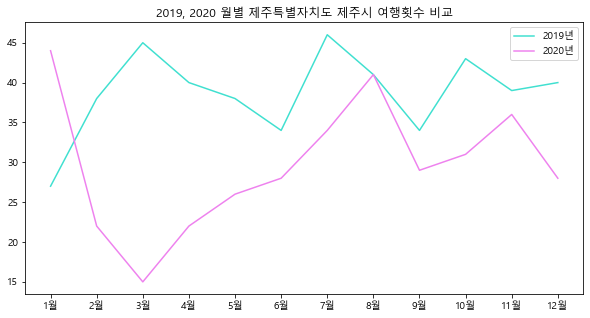

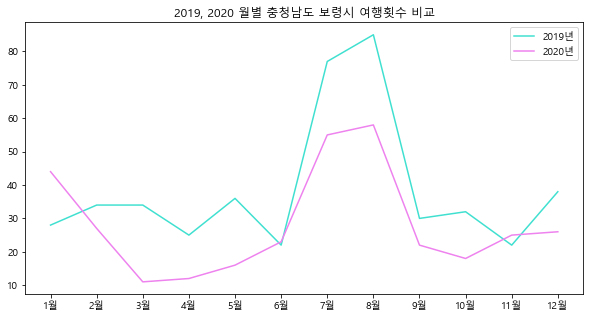

In [ ]:
for city in toplist :
    plt.rc('font', family='Malgun Gothic')
    fig = plt.figure(figsize=(10,5))

    plt.title('2019, 2020 월별 ' + city + ' 여행횟수 비교')

    plt.plot(months, pivot_2019.loc[city], 'turquoise')
    plt.plot(months, pivot_2020.loc[city], 'violet')

    plt.legend(labels = ['2019년', '2020년'], loc='best')
    plt. show()

#### 분석결과
- 코로나19로 인해 모든 지역에서 2020년 3월에 최저치를 찍었고 2020년의 여행횟수가 2019년보다 낮다.
- 대부분의 지역에서 방학이나 연휴가 끼여있는 12&1월 겨울, 7&8월 여름, 10월 추석연휴에 높은수치를 보이지만<br>
    수학여행 장소로 많이 꼽히는 경주는 4월에, 보령은 머드축제가 열리는 8월에 많이 방문한다.<br>
    전주의 경우 봄&가을의 여행 수가 많은데 전주의 관광지는 실외가 많아 여름과 겨울에는 너무 덥거나 추워서 비선호한다고 한다.

- 월별 최다 여행지 선정 후 여행지 추천

In [ ]:
for i in range(12) :
    #총 방문횟수를 기준으로 정렬
    month_top_2019 = pivot_2019.sort_values(by=('SPOT', i+1), ascending=False)
    month_top_2020 = pivot_2020.sort_values(by=('SPOT', i+1), ascending=False)

    #방문횟수 상위 5개 지역만 선정
    month_top5_2019 = month_top_2019.iloc[0:5, i]
    month_top5_2020 = month_top_2020.iloc[0:5, i]

    #지역이름만 가져와서 리스트화
    L_top5_2019 = month_top5_2019.index.tolist()
    L_top5_2020 = month_top5_2020.index.tolist()

    #두 해 동안 모두 top5에 속한 지역만 추출
    double_top5 = []
    for j in range(5):
        x = L_top5_2019[j]
        if x in L_top5_2020 :
            double_top5.append(x)

    print( str(i+1) + '월의 추천 여행지는 ' + str(double_top5) + ' 입니다.')
#sort_2020 = pivot_2020.sort_values(by='TOTAL', ascending=False)

1월의 추천 여행지는 ['부산광역시 해운대구', '제주특별자치도 서귀포시', '강원도 강릉시', '경상북도 경주시'] 입니다.
2월의 추천 여행지는 ['부산광역시 해운대구', '제주특별자치도 서귀포시', '경상북도 경주시'] 입니다.
3월의 추천 여행지는 ['제주특별자치도 서귀포시'] 입니다.
4월의 추천 여행지는 ['경상북도 경주시', '제주특별자치도 서귀포시'] 입니다.
5월의 추천 여행지는 ['제주특별자치도 서귀포시', '경상북도 경주시'] 입니다.
6월의 추천 여행지는 ['경상북도 경주시', '제주특별자치도 서귀포시'] 입니다.
7월의 추천 여행지는 ['충청남도 보령시', '부산광역시 해운대구', '제주특별자치도 서귀포시', '강원도 강릉시'] 입니다.
8월의 추천 여행지는 ['강원도 속초시', '충청남도 보령시', '강원도 강릉시'] 입니다.
9월의 추천 여행지는 ['경상북도 경주시', '제주특별자치도 서귀포시', '경기도 가평군'] 입니다.
10월의 추천 여행지는 ['경상북도 경주시', '제주특별자치도 서귀포시'] 입니다.
11월의 추천 여행지는 ['경상북도 경주시', '제주특별자치도 서귀포시'] 입니다.
12월의 추천 여행지는 ['강원도 강릉시', '강원도 속초시', '경상북도 경주시'] 입니다.


**분석결과**

- 이전 데이터 분석과 달리 실질적 관광객 데이터를 분석했을 때

- 12월 제외 모든 월의 추천여행지에 제주도가 포함된다 (사람들이 제주도를 모든 월에 걸쳐 많이 감)
- 부산, 강릉, 속초 지역은 여름과 겨울에 자주가는 여행지이다.
- 반대로 경주는 봄 4~6월, 가을 9~11월에 자주가는 여행지이다.

**타겟선정**

    - 다양한 여행지 중에서 우리 조는 제주도를 타겟 지역으로 선정했다.

![image.png](attachment:image.png)

- 현실적인 결과는 경기와 강원이 나왔지만, 가장 소망하는 여행지는 '제주도'이다.

![image.png](attachment:image.png)


- 때문에 이번 발표에서는 가장 소망하는 여행지의 여행 경비를 분석하여, 여러분이 좀 더 효율적인 여행을 할 수 있는 지표를 마련하려 한다.

## 타겟 티역은 '제주도'로 선정

![image.png](attachment:image.png)

# Focused Analysis

## 제주도 호텔 가격 비교

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
hotel_name = []
hotel_star = []
hotel_location = []
hotel_rating = []
hotel_price = []
date =[]
year = [2022]
month = list(range(1,13,1))
day = [31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(len(year)):
    for j in range(len(month)):
        for h in range(1,day[j]+1):
                date.append(str(year[i])+ "-"+str(month[j])+"-"+str(h))
date = date[48:401]

In [ ]:
driver = webdriver.Chrome('chromedriver')

1. 네이버 호텔 중 제주도의 호텔 크롤링
2. 2022년 2월 18일부터 2022년 12월 31일까지 각 날짜별로 가장 인기가 높은 20개의 호텔 가격정보를 수집
3. 호텔 가격정보는 최저가 + 세금이 포함된 가격임
4. 성인 2명 기준, 가장 저렴한 방의 숙박 비용임
5. 가격과 평점 숫자형 데이터로 변환함

In [ ]:
for k in range(1,len(date)):
    baseurl1 = 'https://hotel.naver.com/hotels/list?destination=place:Jeju_Province'
    checkin = '&checkin='+date[k-1]
    checkout = '&checkout='+date[k]
    baseurl2 = '&rooms=2&sortField=popularityKR&sortDirection=descending'
    url = baseurl1 + checkin +checkout+ baseurl2
    driver.get(url) 
    driver.implicitly_wait(15)
    # a = driver.find_element_by_xpath("/html/body/div/div/div[1]/div[1]/div[2]/div/div[1]/div[1]/ul/li[2]/label/span[1]")
    # b = driver.find_element_by_xpath("/html/body/div/div/div[1]/div[1]/div[2]/div/div[1]/div[1]/ul/li[3]/label/span[1]")
    # a.click()
    # b.click()
    # time.sleep(2)
    # driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    # c = driver.find_element_by_xpath("/html/body/div/div/div[1]/div[1]/div[2]/div/div[2]/a[1]")
    # c.click()
    # time.sleep(2)
    d= driver.find_element_by_xpath("/html/body/div/div/div[1]/div[2]/div[6]/div[1]/div/button")
    d.click()
    time.sleep(5)
    for i in range(1):
        time.sleep(5)
        a = driver.find_elements(By.CLASS_NAME,("hotel_name_ko.ng-binding"))
        for i in a:
            if i.text != '':
                hotel_name.append(i.text.strip())

        a = driver.find_elements(By.CLASS_NAME,("grade.ng-binding"))
        for i in a:
            if i.text != '':
                hotel_star.append(i.text.strip())
        a = driver.find_elements(By.CLASS_NAME,("instance.sp_hotel_bf.ng-binding"))
        for i in a:
            if i.text != '':
                hotel_location.append(i.text.strip())

        a = driver.find_elements(By.CLASS_NAME,("star_txt.ng-binding"))
        for i in a:
            if i.text == '':
                hotel_rating.append('0')
            else:
                hotel_rating.append(i.text.strip())
            
        a = driver.find_elements(By.CLASS_NAME,("min_price.ng-scope"))
        for i in a:
            if i.text != '':
                hotel_price.append(i.text.strip("~").replace(",", "").replace("원", ""))
        # c = driver.find_element_by_xpath("/html/body/div/div/div[1]/div[2]/div[6]/div[2]/a[2]")
        # c.click()
        # time.sleep(5)

    print(len(hotel_name),len(hotel_star),len(hotel_location),len(hotel_rating),len(hotel_price))

In [ ]:
#데이터프레임 형태로 저장
a= []
count = 0
j = 0
for i in range(len(hotel_name)):
    
    a.append(str(date[j])+","+hotel_name[i] +","+ str(hotel_star[i]) +","+str(hotel_rating[i])+ ","+ hotel_location[i] +","+str(hotel_price[i]))
    count +=1
    if count == 20:
        count = 0
        j  += 1
df = pd.DataFrame(a)
df.to_csv('제주도호텔정보(2022-2-18~2022-12-30).csv')     

1.엑셀로 인덱스 번호 삭제, (,) 기준으로 데이터 나눠서 저장함

2.날짜,이름,성급,별점,위치,국가,가격 컬럼명 지정함

### 2022년 2월 18일부터 12월 30일까지의 TOP20 호텔 정보

In [ ]:
df = pd.read_csv('제주도호텔정보(2022-2-18~2022-12-30).csv',encoding='euc-kr')
df  

,날짜,이름,성급,별점,위치,국가,가격
0,2022-02-18,랜딩관 제주신화월드 호텔앤리조트,5성급,8.3,서귀포,대한민국,144445
1,2022-02-18,롯데 호텔 제주,5성급,8.6,서귀포,대한민국,345520
2,2022-02-18,제주 신라 호텔,5성급,8.9,서귀포,대한민국,520300
3,2022-02-18,롯데시티호텔 제주,4성급,8.6,제주,대한민국,205700
4,2022-02-18,그랜드 조선 제주,5성급,8.6,서귀포,대한민국,413525
...,...,...,...,...,...,...,...
6315,2022-12-30,신신호텔 제주공항,4성급,7.8,제주,대한민국,40500
6316,2022-12-30,신신호텔 천지연,4성급,0.0,서귀포,대한민국,35661
6317,2022-12-30,골든데이지 서귀포오션 호텔,4성급,8.1,서귀포,대한민국,44974
6318,2022-12-30,오션스위츠 제주 호텔,4성급,8.2,제주,대한민국,81621


In [ ]:
#요일 칼럼 추가
from datetime import datetime
df['요일'] = 0
count = 0
dateDict = {0: '월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}
for i in df['날짜']:
    date = i
    datetime_date = datetime.strptime(date, '%Y-%m-%d')
    df['요일'][count] = dateDict[datetime_date.weekday()]
    count += 1

C:\Users\User\AppData\Local\Temp/ipykernel_16532/1983368985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'][count] = dateDict[datetime_date.weekday()]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#316일동안 인기 TOP 20에 든 호텔 이름 (총 34곳)
print(len(df['날짜'].unique()))
print(len(df['이름'].unique()))
df['이름'].unique()

316
34


array(['랜딩관 제주신화월드 호텔앤리조트', '롯데 호텔 제주', '제주 신라 호텔', '롯데시티호텔 제주',
       '그랜드 조선 제주', '신화관 제주신화월드 호텔앤리조트', '라마다 프라자 제주 호텔', '메종 글래드 제주',
       '신라스테이 제주', '호텔 난타', '더큐브 리조트 제주', '호텔 리젠트 마린 더 블루', '휘슬락 호텔',
       '라마다 제주 시티 호텔', '메리어트관 제주신화월드 호텔앤리조트', '유탑 유블레스호텔', '브라운 스위트 제주',
       '서머셋 제주신화월드', '그랜드 하얏트 제주', '히든 클리프 호텔&네이쳐', '골든튤립 제주성산호텔',
       '서귀포 JS호텔', '해비치 호텔 & 리조트', '더 베스트 제주 성산', '베스트웨스턴 제주호텔',
       '글로스터 호텔 제주', '휘닉스 제주 섭지코지', '신신호텔 제주공항', '다인 오세아노 호텔', '신신호텔 천지연',
       '골든데이지 서귀포오션 호텔', '오션스위츠 제주 호텔', '플레이스 캠프 제주', '제주 디 아일랜드 블루 호텔'],
      dtype=object)

In [ ]:
con = df['이름'].value_counts() == 316
a = con[con]
TOP8_hotels = list(a.index)


## 성급별 가격비교

In [ ]:
starprice_mean = df.groupby(['성급'])['가격'].agg(**{
'starprice_mean':'mean',
'starprice_median':'median'
}).reset_index()
starprice_mean.sort_values(by =['성급'],ascending=True)

,성급,starprice_mean,starprice_median
0,4성급,88292.163014,72553.0
1,5성급,303627.618267,296250.0


In [ ]:
round(starprice_mean.loc[1,"starprice_mean"] / starprice_mean.loc[0,"starprice_mean"], 2)

3.44

### 5성급 호텔의 평균 금액이 4성급 호텔의 평균 금액보다 3.44배 더 비싸다.

In [ ]:
starpricedate_mean = df.groupby(['성급','날짜'])['가격'].agg(**{
'starprice_mean':'mean',
'starprice_median':'median'
}).reset_index()
stardata = starpricedate_mean.sort_values(by =['성급','날짜'],ascending=True)

<AxesSubplot:title={'center':'성급별 호텔 평균 금액'}, xlabel='성급', ylabel='starprice_mean'>

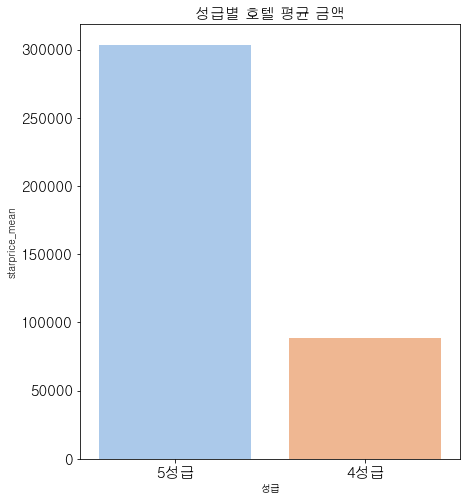

In [ ]:
sns.set_palette("pastel")
fig = plt.figure(figsize=(15, 8))
area1 = fig.add_subplot(1,2,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('성급별 호텔 평균 금액',fontsize=15)
sns.barplot(data =starprice_mean.sort_values(by =['성급'],ascending=False), x="성급", y="starprice_mean", ax = area1)

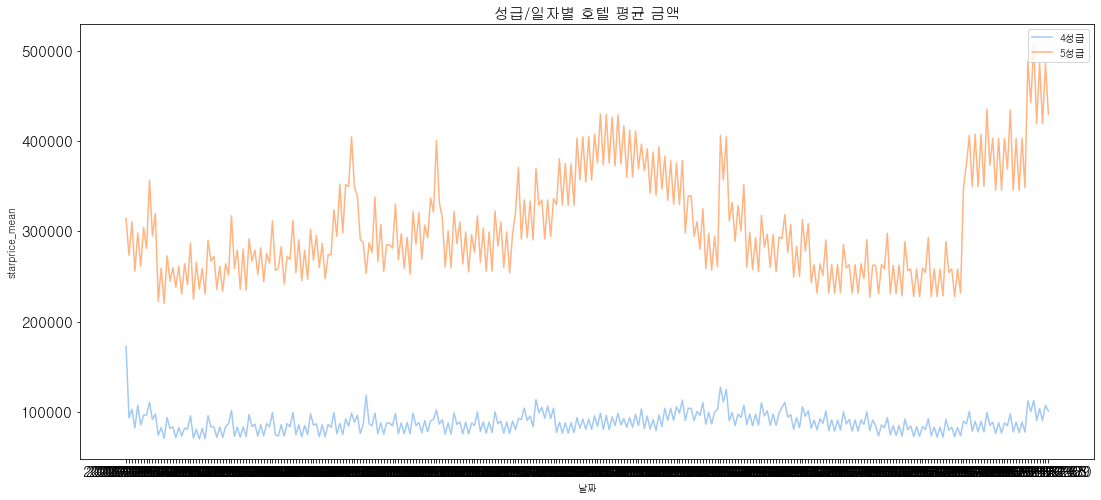

In [ ]:
sns.set_palette("pastel")
fig = plt.figure(figsize=(40, 8))
area1 = fig.add_subplot(1,2,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('성급/일자별 호텔 평균 금액',fontsize=15)


sns.lineplot(data =starpricedate_mean[starpricedate_mean["성급"] == "4성급"], x="날짜", y="starprice_mean", ax = area1,legend = False)
sns.lineplot(data =starpricedate_mean[starpricedate_mean["성급"] == "5성급"], x="날짜", y="starprice_mean", ax = area1,legend = False)
plt.legend(labels = ['4성급','5성급'],loc = 'upper right')

### TOP 20 호텔은 5성급과 4성급으로 이루어져 있으며, 4성급의 선호도가 더 높음

In [ ]:
print(df['성급'].value_counts())

4성급    3331
5성급    2989
Name: 성급, dtype: int64


### 대한항공 성수기는 제주도의 경우  2022년  2월 20~3월1일, 5월4일~5월 8일, 6월 4일~6월 6일, 7월 23일~8월21일, 9월 8일 ~9월 13일,10월1일~10월3일, 12월 31일이다.

### 추석 연휴인 9월 9일과 대체공휴일 전 날인 9월 11일에 호텔의 평균 가격이 가장 높다.
어린이날(5월 5일) 다음날인 5월 6일이 3번째로 높으며 현충일(6월6일 월요일)전날인 6월 4일이 4번째로 높고, 크리스마스(12월 25일) 당일이 5번째로 높다. 

In [ ]:
hotelday_mean = df.groupby(['요일','날짜'])['가격'].agg(**{
'hotel_mean':'mean',
'hotel_median':'median'
}).reset_index()
a = hotelday_mean.sort_values(by =['hotel_mean'],ascending=False).head(50)
popdate = list(a['날짜'])
a

,요일,날짜,hotel_mean,hotel_median
29,금요일,2022-09-09,266873.45,204556.0
210,일요일,2022-09-11,264846.25,216497.0
11,금요일,2022-05-06,251710.50,198861.5
241,토요일,2022-06-04,251365.00,168693.0
225,일요일,2022-12-25,251026.25,138383.5
0,금요일,2022-02-18,250610.25,190349.5
251,토요일,2022-08-13,249853.50,181255.0
249,토요일,2022-07-30,247639.80,174845.5
24,금요일,2022-08-05,247216.30,174845.5
159,월요일,2022-08-01,246101.60,174845.5


### 가장 저렴한 날짜는 다음과 같으며 대체로 11월달과 10월달에 호텔 평균 가격이 낮다

In [ ]:
a = hotelday_mean.sort_values(by =['hotel_mean'],ascending=False).tail(50)
a

,요일,날짜,hotel_mean,hotel_median
81,목요일,2022-10-27,160043.30,120676.5
304,화요일,2022-10-11,159686.75,120676.5
170,월요일,2022-10-17,159686.75,120676.5
125,수요일,2022-10-19,159686.75,120676.5
306,화요일,2022-10-25,159681.00,120676.5
93,수요일,2022-03-09,159574.65,116381.5
172,월요일,2022-10-31,159541.95,120676.5
49,목요일,2022-03-17,158374.55,112022.5
261,토요일,2022-10-22,155676.20,124068.0
272,화요일,2022-03-01,155506.20,117665.0


### 2022년 2월부터 12월까지 제주도 호텔 평균 가격은 토요일 ,금요일, 일요일 순으로 높으며 수요일에 가장 저렴함

In [ ]:
hotel_mean = df.groupby('요일')['가격'].agg(**{
'hotel_mean':'mean',
'hotel_median':'median'
}).reset_index()
hotel_mean.sort_values(by =['hotel_mean'],ascending=False)

,요일,hotel_mean,hotel_median
5,토요일,204168.041111,144445.0
0,금요일,200307.325000,144445.0
4,일요일,188943.317778,135058.0
3,월요일,186364.606667,128750.0
1,목요일,185408.320000,133580.0
6,화요일,183380.553333,127695.0
2,수요일,182136.724444,125400.0


<AxesSubplot:title={'center':'요일별 호텔 평균 금액'}, xlabel='요일', ylabel='hotel_mean'>

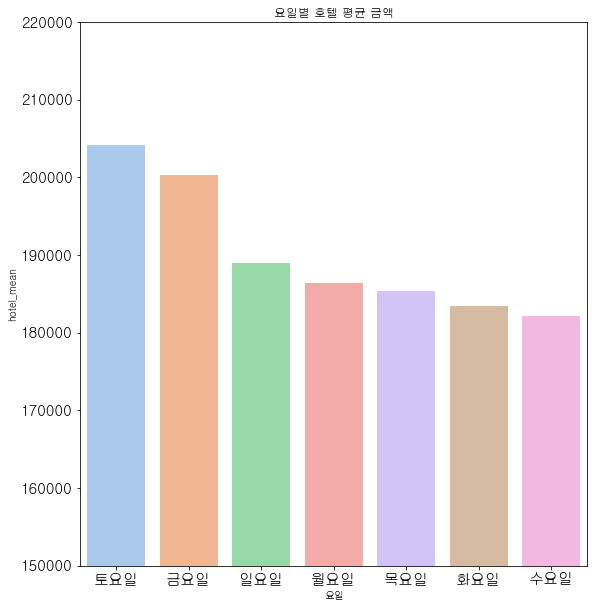

In [ ]:
week = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
sns.set_palette("pastel")

fig = plt.figure(figsize=(20, 10))
area1 = fig.add_subplot(1,2,1)
plt.ylim(150000,220000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('요일별 호텔 평균 금액')
sns.barplot(data =hotel_mean.sort_values(by =['hotel_mean'],ascending=False), x="요일", y="hotel_mean", ax = area1)

### 서머셋 제주신화월드 ,그랜드 하얏트 제주, 롯데시티호텔 제주, 그랜드 조선 제주, 신화관 제주신화월드 호텔앤리조트,라마다 프라자 제주 호텔, 더큐브 리조트 제주, 신라스테이 제주 

### 총 8곳이 316일 동안 하루도 빠짐없이 TOP 20에 랭크됨

In [ ]:
print(df['이름'].value_counts())

서머셋 제주신화월드             316
그랜드 하얏트 제주             316
롯데시티호텔 제주              316
그랜드 조선 제주              316
신화관 제주신화월드 호텔앤리조트      316
라마다 프라자 제주 호텔          316
더큐브 리조트 제주             316
신라스테이 제주               316
호텔 난타                  286
랜딩관 제주신화월드 호텔앤리조트      286
히든 클리프 호텔&네이쳐          257
휘슬락 호텔                 256
제주 신라 호텔               248
골든튤립 제주성산호텔            244
롯데 호텔 제주               225
베스트웨스턴 제주호텔            183
글로스터 호텔 제주             183
해비치 호텔 & 리조트           177
더 베스트 제주 성산            163
휘닉스 제주 섭지코지            142
신신호텔 제주공항              140
메리어트관 제주신화월드 호텔앤리조트    135
라마다 제주 시티 호텔           133
유탑 유블레스호텔              133
서귀포 JS호텔               108
신신호텔 천지연                95
메종 글래드 제주               81
호텔 리젠트 마린 더 블루          72
브라운 스위트 제주              72
골든데이지 서귀포오션 호텔          60
오션스위츠 제주 호텔             59
플레이스 캠프 제주              30
제주 디 아일랜드 블루 호텔         22
다인 오세아노 호텔               2
Name: 이름, dtype: int64


### TOP8 호텔의 가격은 비슷한 동향을 보임

<AxesSubplot:title={'center':'TOP8 호텔 일자별 가격 동향'}, xlabel='날짜', ylabel='가격'>

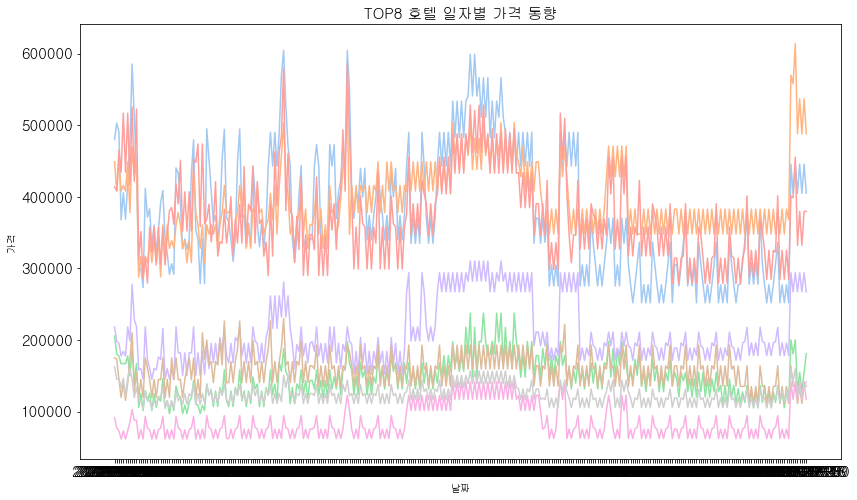

In [ ]:
a = df[df['이름'] == TOP8_hotels[0]]
b = df[df['이름'] == TOP8_hotels[1]]
c = df[df['이름'] == TOP8_hotels[2]]
d = df[df['이름'] == TOP8_hotels[3]]
e = df[df['이름'] == TOP8_hotels[4]]
f = df[df['이름'] == TOP8_hotels[5]]
g = df[df['이름'] == TOP8_hotels[6]]
h = df[df['이름'] == TOP8_hotels[7]]
dflist = [a,b,c,d,e,f,g,h]
sns.set_palette("pastel")
fig = plt.figure(figsize=(30, 8))
area1 = fig.add_subplot(1,2,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('TOP8 호텔 일자별 가격 동향',fontsize=15)
sns.lineplot(data =a, x="날짜", y="가격", ax = area1)
sns.lineplot(data =b, x="날짜", y="가격", ax = area1)
sns.lineplot(data =c, x="날짜", y="가격", ax = area1)
sns.lineplot(data =d, x="날짜", y="가격", ax = area1)
sns.lineplot(data =e, x="날짜", y="가격", ax = area1)
sns.lineplot(data =f, x="날짜", y="가격", ax = area1)
sns.lineplot(data =g, x="날짜", y="가격", ax = area1)
sns.lineplot(data =h, x="날짜", y="가격", ax = area1)

## 위치별 가격

### 제주시와 서귀포시 비교



### 제주시보다 서귀포시에 인기 호텔 수가 더 많다.

In [ ]:
a = df['위치'].value_counts()
a

서귀포    3528
제주     2792
Name: 위치, dtype: int64

In [ ]:
print("서귀포시의 인기 호텔 비중이 ",round(a[0]/a[1],2)," 배 더 높다.")

서귀포시의 인기 호텔 비중이  1.26  배 더 높다.


### 서귀포시의 평균 호텔 가격이 더 비싸다

<AxesSubplot:title={'center':'위치별 호텔 평균 금액'}, xlabel='위치', ylabel='location_mean'>

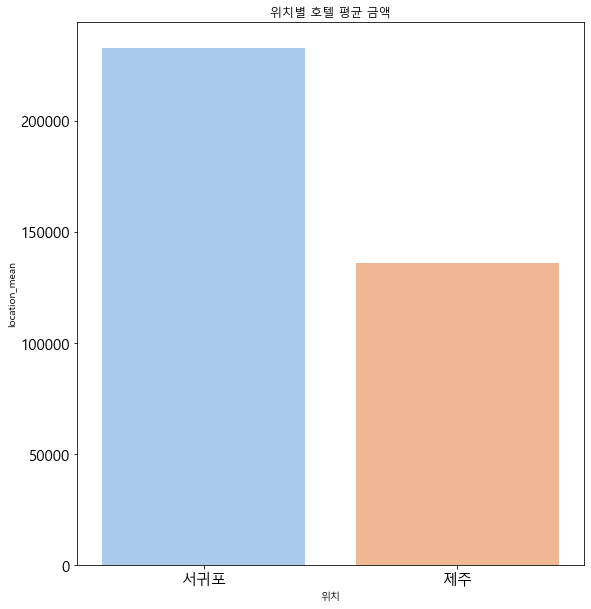

In [ ]:
location_mean = df.groupby(['위치'])['가격'].agg(**{
'location_mean':'mean',
'location_median':'median'
}).reset_index()
sns.set_palette("pastel")
fig = plt.figure(figsize=(20, 10))
area1 = fig.add_subplot(1,2,1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('위치별 호텔 평균 금액')
sns.barplot(data =location_mean, x="위치", y="location_mean", ax = area1)

### 서귀포시 호텔 성급별 비율

In [ ]:
a = df[df['위치']=='서귀포']
b = list(a['성급'].value_counts())
b

[2276, 1252]

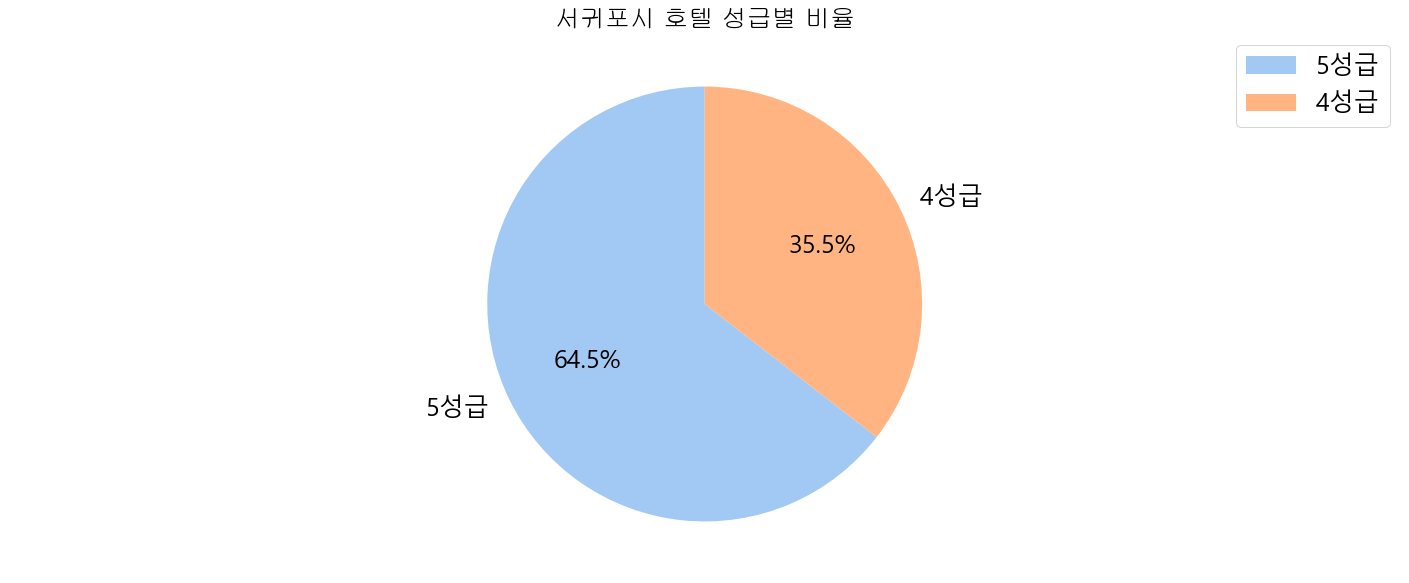

In [ ]:
plt.figure(figsize=(25, 10))
label = ['5성급','4성급']
color = ['deeppink','pink','hotpink','lavenderblush']
plt.axis('equal')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family = 'Malgun Gothic')
plt.title('서귀포시 호텔 성급별 비율', fontsize=25)
plt.pie(b,labels=label,autopct='%.1f%%',startangle=90,textprops={'size': 25})
plt.legend(fontsize=25)
plt.show()

### 제주시 호텔 성급별 비율

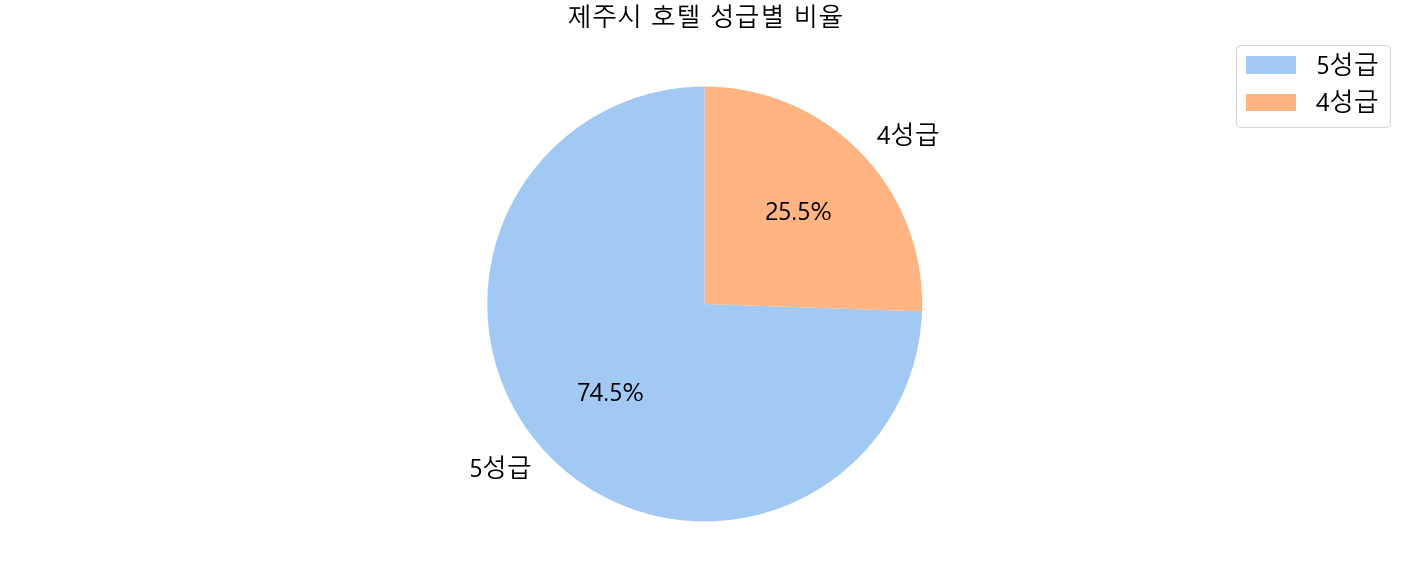

In [ ]:
a = df[df['위치']=='제주']
b = list(a['성급'].value_counts())
plt.figure(figsize=(25, 10))
label = ['5성급','4성급']
color = ['deeppink','pink','hotpink','lavenderblush']
plt.axis('equal')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family = 'Malgun Gothic')
plt.title('제주시 호텔 성급별 비율', fontsize=25)
plt.pie(b,labels=label,autopct='%.1f%%',startangle=90,textprops={'size': 25})
plt.legend(fontsize=25)
plt.show()

### 4성급 호텔은 제주시가 더 비싸고, 5성급 호텔은 서귀포시가 더 비싸다.

In [ ]:
locationstar_mean = df.groupby(['위치','성급'])['가격'].agg(**{
'locationstar_mean':'mean',
'locationstar_median':'median'
}).reset_index()
locationstar_mean

,위치,성급,locationstar_mean,locationstar_median
0,서귀포,4성급,80865.611821,55860.5
1,서귀포,5성급,316563.302285,298642.5
2,제주,4성급,92764.525734,84000.0
3,제주,5성급,262335.028050,192941.0


In [ ]:
four = locationstar_mean.iloc[2]['locationstar_mean']/locationstar_mean.iloc[0]['locationstar_mean']
five = locationstar_mean.iloc[1]['locationstar_mean']/locationstar_mean.iloc[3]['locationstar_mean']
print("4성급 호텔은 제주시가 서귀포시보다 ",round(four,2),"배 더 비싸다.")
print("5성급 호텔은 서귀포시가 제주시보다 ",round(five,2),"배 더 비싸다.")

4성급 호텔은 제주시가 서귀포시보다  1.15 배 더 비싸다.
5성급 호텔은 서귀포시가 제주시보다  1.21 배 더 비싸다.


### 서귀포시에 호텔이 1.26배 더 많지만, TOP8 호텔 중 서귀포시에 위치한 호텔이 4개, 제주시에 위치한 호텔이 4개로 지역별 비율은 같다.

### 서귀포시에는 5성급 3개, 4성급 1개가 있고, 제주시에는 5성급 2개, 4성급 2개가 있다.

In [ ]:
a = df[df['날짜'].isin(popdate)]
b = a[a['이름'].isin(TOP8_hotels)]
b = b.sort_values(by =['이름','날짜'])
print(b[b['위치']=='서귀포'][['이름','성급']].value_counts())
print(b[b['위치']=='제주'][['이름','성급']].value_counts())

이름                 성급 
그랜드 조선 제주          5성급    50
더큐브 리조트 제주         4성급    50
서머셋 제주신화월드         5성급    50
신화관 제주신화월드 호텔앤리조트  5성급    50
dtype: int64
이름             성급 
그랜드 하얏트 제주     5성급    50
라마다 프라자 제주 호텔  5성급    50
롯데시티호텔 제주      4성급    50
신라스테이 제주       4성급    50
dtype: int64


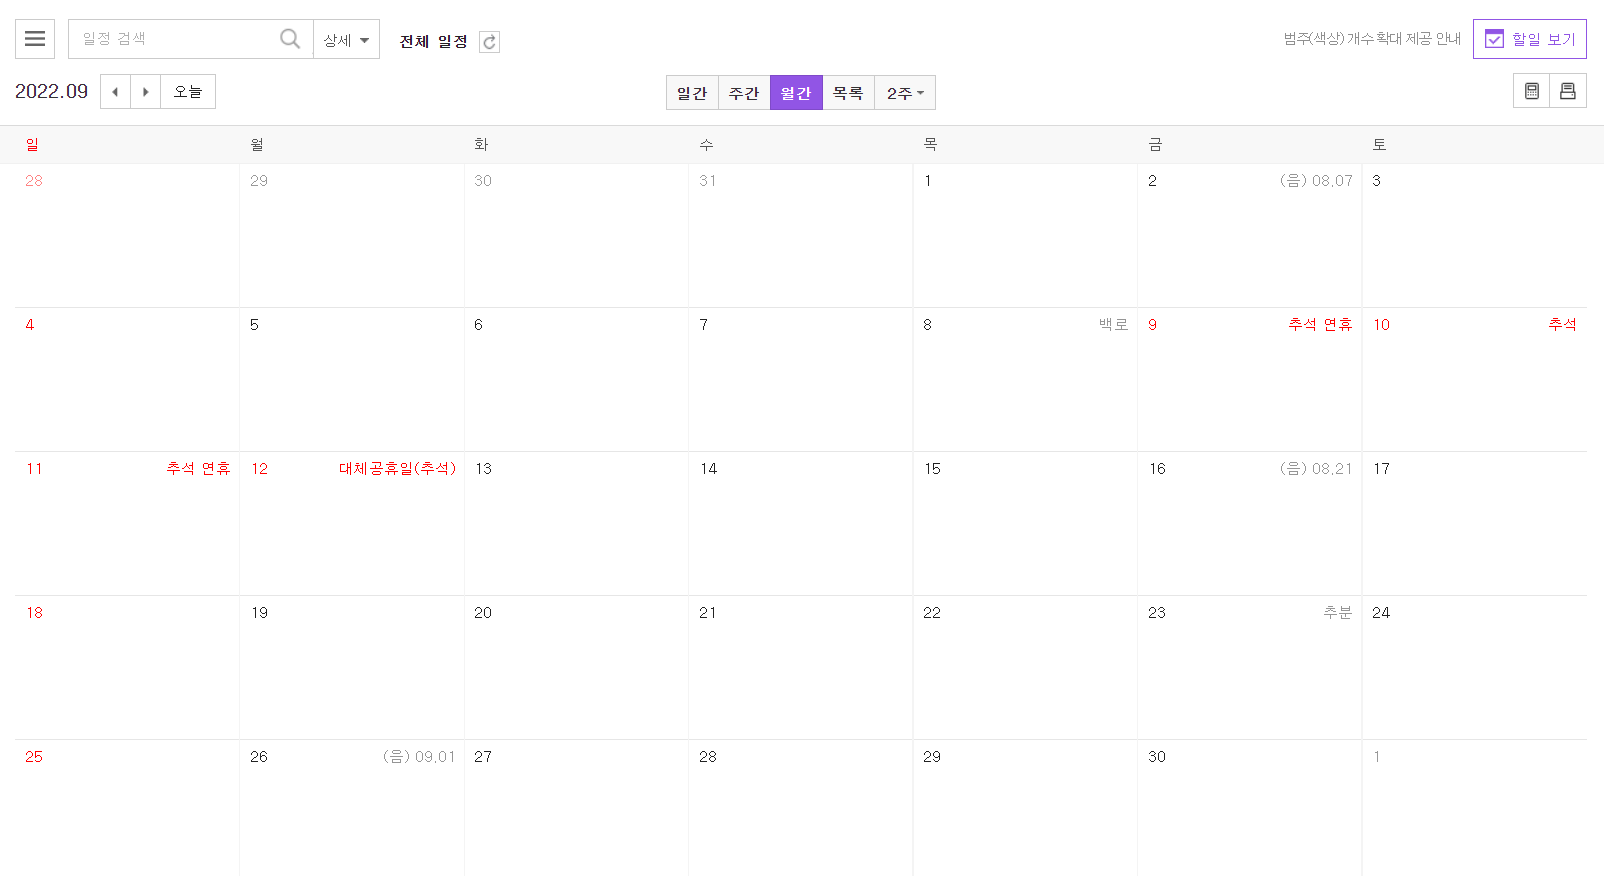

In [ ]:
from IPython.display import Image
Image("9월달력.png") 

### 평균 가격이 가장 높았던 9월 9(추석연휴)일 기준으로 저렴한 호텔은 다음과 같다.

In [ ]:
df[df['날짜']=='2022-09-09'].sort_values(by =['가격'],ascending=True)

,날짜,이름,성급,별점,위치,국가,가격,요일
4074,2022-09-09,골든튤립 제주성산호텔,4성급,7.9,서귀포,대한민국,38889,금요일
4076,2022-09-09,더 베스트 제주 성산,4성급,8.3,서귀포,대한민국,55556,금요일
4078,2022-09-09,글로스터 호텔 제주,4성급,8.4,제주,대한민국,61248,금요일
4068,2022-09-09,호텔 난타,4성급,8.6,제주,대한민국,80040,금요일
4077,2022-09-09,베스트웨스턴 제주호텔,4성급,8.0,제주,대한민국,84000,금요일
4070,2022-09-09,휘슬락 호텔,4성급,7.9,제주,대한민국,109434,금요일
4069,2022-09-09,더큐브 리조트 제주,4성급,0.0,서귀포,대한민국,141709,금요일
4067,2022-09-09,신라스테이 제주,4성급,8.2,제주,대한민국,144210,금요일
4066,2022-09-09,라마다 프라자 제주 호텔,5성급,8.2,제주,대한민국,192941,금요일
4063,2022-09-09,롯데시티호텔 제주,4성급,8.6,제주,대한민국,198000,금요일


### 4성급 호텔 중 서귀포에서 가장 저렴한 호텔

In [ ]:
df[(df['날짜']=='2022-09-09')&(df['성급']=='4성급')&(df['위치']=='서귀포')].sort_values(by =['가격','성급'],ascending=True).head(1)

,날짜,이름,성급,별점,위치,국가,가격,요일
4074,2022-09-09,골든튤립 제주성산호텔,4성급,7.9,서귀포,대한민국,38889,금요일


### 4성급 호텔 중 제주에서 가장 저렴한 호텔

In [ ]:
df[(df['날짜']=='2022-09-09')&(df['성급']=='4성급')&(df['위치']=='제주')].sort_values(by =['가격','성급'],ascending=True).head(1)

,날짜,이름,성급,별점,위치,국가,가격,요일
4078,2022-09-09,글로스터 호텔 제주,4성급,8.4,제주,대한민국,61248,금요일


### 5성급 호텔 중 서귀포에서 가장 저렴한 호텔

In [ ]:
df[(df['날짜']=='2022-09-09')&(df['성급']=='5성급')&(df['위치']=='서귀포')].sort_values(by =['가격','성급'],ascending=True).head(1)

,날짜,이름,성급,별점,위치,국가,가격,요일
4060,2022-09-09,랜딩관 제주신화월드 호텔앤리조트,5성급,8.3,서귀포,대한민국,211112,금요일


### 5성급 호텔 중 제주에서 가장 저렴한 호텔

In [ ]:
df[(df['날짜']=='2022-09-09')&(df['성급']=='5성급')&(df['위치']=='제주')].sort_values(by =['가격','성급'],ascending=True).head(1)

,날짜,이름,성급,별점,위치,국가,가격,요일
4066,2022-09-09,라마다 프라자 제주 호텔,5성급,8.2,제주,대한민국,192941,금요일


### 결론 : 4성급 호텔을 저렴하게 이용하고 싶다면 서귀포시에, 5성급 호텔을 저렴하게 이용하고 싶다면 제주시에 숙소를 잡는 것이 좋다.

## 항공권 비수기, 성수기 가격 비교

### 네이버 항공권 크롤링

네이버 항공권을 기준으로 일반석과, 할인석을 검사해 보았다.
일반석의 경우, 일반석은 시간에 따라 비행기 가격에 있어 가격차이가 없다.
하지만 할인석의 경우, 할인석은 시간에 따라 비행기 가격에 있어 가격차이가 있다.
url:https://flight.naver.com/flights/domestic/GMP-CJU-20220423?adult=1&child=0&infant=0&fareType=YC&selectedFlight=
base_url:https://flight.naver.com/flights/domestic/GMP-CJU-
plus_url:?adult=1&child=0&infant=0&fareType=YC&selectedFlight=
date_url:20220423
으로 볼 수 있다.

In [ ]:
base_url= "https://flight.naver.com/flights/domestic/GMP-CJU-"
date_url= "20220217"
plus_url= "?adult=1&child=0&infant=0&fareType=YC&selectedFlight="
url = base_url+date_url+plus_url

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
driver = webdriver.Chrome("chromedriver.exe")#r"C:\Users\82104\chromedriver/chromedriver.exe"
driver.get(url)

편도를 기준으로, 김포 -> 제주도를 가는것으로 채택하였다. 항공사는 제주항공으로 고정하겠다.
항공사별 차이가 있기 때문에, 항공사 1개를 기준으로 채택하여야 하며,
출발지에 따라 가격이 다르기 때문에, 공항도 1개를 고정으로 하여야 한다.
항공사 별 싼 가격을 기준으로 잡는다면, 여러 항공사를 보아야 하며,
항공사 내에서도 일반석, 할인석을 기준으로 볼 수 있을 것이다.


크롬드라이버를 이용하여 홈페이지에 접속하자, 크롬드라이버가 아니더라도 홈페이지 자체적으로 로드 되는 시간이 약 3초 가량 소모되는것 같다. 홈페이지 내에서 그다음 날짜를 클릭하는 방법은 주소 url에 날짜에 해당하는 부분에 다음 날짜를 넣거나
해당 홈페이지에서 다음 날짜를 가리키고 있는 버튼을 클릭하는 방법이 있다.
url로 날짜에 해당하는 부분을 넣어 크롤링을 하는 방법을 채택할 경우, 홈페이지 자체적으로 로드 되는 3초+ 조건 필터링 클릭 시간이 필요하다.
하지만, 홈페이지에 로드되는 3초 시간 이후, 필터링 조건으로 다음 날짜를 클릭한다면, 시간 소모를 줄일 수 있다.
여기서, 해당 날짜를 클릭하는 방법을 알아야 한다.

In [ ]:
elem = driver.find_element(By.CLASS_NAME,'List_top')
print(elem)
print(elem.text)


elem_set = elem.find_element(By.CLASS_NAME, 'inlineFilter_FilterWrapper__1Icm4')
print("\n")
print(elem_set.text)


elem_set_click_1=elem_set.find_elements(By.CLASS_NAME, 'inlineFilter_Tag__97qqq')
print("\n")
print(elem_set_click_1[0].text)
print(elem_set_click_1[1].text)


elem_set_click_1[0].click()

elem_chair=driver.find_elements(By.CLASS_NAME,'modal') # 필터링 안으로 들어옴
elem_chair_set= elem_chair[0].find_elements(By.CLASS_NAME,'panel')
elem_chair_set_2= elem_chair_set[0].find_elements(By.CLASS_NAME,'radiogroup')
elem_chair_set_3= elem_chair_set_2[0].find_elements(By.CLASS_NAME, 'radio')
print(len(elem_chair_set_3))

elem_chair_set_3[3].click()


#항공사 클릭하기

elem_airplane=elem_chair[0].find_elements(By.CLASS_NAME,"tabs")
elem_airplane_set=elem_airplane[0].find_elements(By.CLASS_NAME,"tab")
elem_airplane_set[1].click() #항공사 필터링 클릭
elem_jeju_air=elem_chair[0].find_elements(By.CLASS_NAME,"checkboxs")

print(len(elem_jeju_air))


elem_jeju_air_set=elem_jeju_air[0].find_elements(By.CLASS_NAME,"checkbox")

print(len(elem_jeju_air_set))


elem_jeju_air_set[5].click()
elem_value=elem_chair[0].find_elements(By.CLASS_NAME,"submit")

print(len(elem_value))

elem_value[0].click()

result_box=driver.find_elements(By.CLASS_NAME,"result")

print(len(result_box))


for i in range(0, len(result_box)):
    result_name =result_box[i].find_element(By.CLASS_NAME,"name").text
    result_start_time = result_box[i].find_elements(By.CLASS_NAME,"time")[0].text
    result_end_time = result_box[i].find_elements(By.CLASS_NAME,"time")[1].text
    result_air_time = result_box[i].find_elements(By.CLASS_NAME,"route")[0].find_element(By.CLASS_NAME,"info").text
    result_seat_type = result_box[i].find_element(By.CLASS_NAME,"domestic_type__30RSq").text
    result_air_type = result_box[i].find_element(By.CLASS_NAME,"domestic_price__1qAgw").find_element(By.CLASS_NAME,'domestic_txt__2YFi_').text
    result_price = result_box[i].find_element(By.CLASS_NAME,"domestic_num__2roTW").text
    print(result_name+result_start_time+result_end_time+result_air_time+result_seat_type+result_air_type+result_price)

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import psycopg2
import pandas as pd


date_set="2022"
base_url= "https://flight.naver.com/flights/domestic/GMP-CJU-"
#date_url= "20220217"
plus_url= "?adult=1&child=0&infant=0&fareType=YC&selectedFlight="


conn_str = "host=localhost dbname=postgres user=postgres password=admin port=5432"
conn = psycopg2.connect(conn_str)

month_length = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
total_length= sum(month_length)           #달력 총 일수

focus_cursor_month=2
focus_cursor_day=17

cur = conn.cursor()
cur.execute('''CREATE TABLE Airplane (number serial, name varchar(15), start_time varchar(8), end_time varchar(8), air_time varchar(10), seat_value varchar(10) ,air_type varchar(10), seat_price varchar(10), Date varchar(10))''') 
conn.commit()

driver = webdriver.Chrome("chromedriver.exe")#r"C:\Users\82104\chromedriver/chromedriver.exe"


for x in range(total_length):
    if len(str(focus_cursor_day)) == 1:
        day="0"+str(focus_cursor_day)
    elif len(str(focus_cursor_day)) == 2:
        day = str(focus_cursor_day)
        
    if len(str(focus_cursor_month)) == 1:
        month="0"+str(focus_cursor_month)
    elif len(str(focus_cursor_month)) == 2:
        month= str(focus_cursor_month)
        
    if month_length[focus_cursor_month-1] != focus_cursor_day:
        focus_cursor_day += 1
    elif month_length[focus_cursor_month-1] == focus_cursor_day:
        focus_cursor_day=1
        focus_cursor_month +=1
        
    date_url=date_set+month+day
    url = base_url+date_url+plus_url
    driver.get(url)
    driver.implicitly_wait(10)
    
#    elem = driver.find_element(By.CLASS_NAME,'List_top')
#    elem_set = elem.find_element(By.CLASS_NAME, 'inlineFilter_FilterWrapper__1Icm4')
#    elem_set_click_1=elem_set.find_elements(By.CLASS_NAME, 'inlineFilter_Tag__97qqq')
#    elem_set_click_1[0].click()
#    elem_chair=driver.find_elements(By.CLASS_NAME,'modal') # 필터링 안으로 들어옴
#    elem_chair_set= elem_chair[0].find_elements(By.CLASS_NAME,'panel')
#    elem_chair_set_2= elem_chair_set[0].find_elements(By.CLASS_NAME,'radiogroup')
#    elem_chair_set_3= elem_chair_set_2[0].find_elements(By.CLASS_NAME, 'radio')
#    elem_chair_set_3[3].click()
#    elem_airplane=elem_chair[0].find_elements(By.CLASS_NAME,"tabs")
#    elem_airplane_set=elem_airplane[0].find_elements(By.CLASS_NAME,"tab")
#    elem_airplane_set[1].click() #항공사 필터링 클릭
#    elem_jeju_air=elem_chair[0].find_elements(By.CLASS_NAME,"checkboxs")
#    elem_jeju_air_set=elem_jeju_air[0].find_elements(By.CLASS_NAME,"checkbox")
#    elem_jeju_air_set[5].click()
#    elem_value=elem_chair[0].find_elements(By.CLASS_NAME,"submit")
#    elem_value[0].click()

    result_box=driver.find_elements(By.CLASS_NAME,"result")
    
    for i in range(0, len(result_box)):
        result_name =result_box[i].find_element(By.CLASS_NAME,"name").text
        result_start_time = result_box[i].find_elements(By.CLASS_NAME,"time")[0].text
        result_end_time = result_box[i].find_elements(By.CLASS_NAME,"time")[1].text
        result_air_time = result_box[i].find_elements(By.CLASS_NAME,"route")[0].find_element(By.CLASS_NAME,"info").text
        result_seat_type = result_box[i].find_element(By.CLASS_NAME,"domestic_type__30RSq").text
        result_air_type = result_box[i].find_element(By.CLASS_NAME,"domestic_price__1qAgw").find_element(By.CLASS_NAME,'domestic_txt__2YFi_').text
        result_price = result_box[i].find_element(By.CLASS_NAME,"domestic_num__2roTW").text
        print(result_name+result_start_time+result_end_time+result_air_time+result_seat_type+result_air_type+result_price+date_url)
        cur.execute("INSERT INTO Airplane (name, start_time, end_time, air_time, seat_value,air_type, seat_price, Date) VALUES (%s, %s, %s, %s, %s, %s, %s, %s);",(result_name,result_start_time,result_end_time,result_air_time,result_seat_type,result_air_type,result_price,date_url))
        conn.commit()
        

### 네이버 크롤링 결과 분석

In [ ]:
import pandas as pd
df = pd.read_csv('./data/airplane.csv', encoding='cp949' ,thousands = ',') # , 제거

다음 airplane.csv는 네이버 항공예약을 크롤링 한 것이다. ... 빼액! 김포 -> 제주도

In [ ]:
df

,number,airplane_name,start_time,end_time,air_time(hour),seat_value,air_type,price,date,season,day
0,1,아시아나항공,15:20,16:30,1:10,할인석,편도,70500,2022-02-17,성수기,목요일
1,2,티웨이항공,15:20,16:30,1:10,할인석,편도,72260,2022-02-17,비성수기,목요일
2,3,티웨이항공,15:20,16:30,1:10,일반석,편도,80360,2022-02-17,비성수기,목요일
3,4,아시아나항공,15:20,16:30,1:10,일반석,편도,130500,2022-02-17,성수기,목요일
4,5,대한항공,15:40,16:50,1:10,할인석,편도,76500,2022-02-17,비성수기,목요일
...,...,...,...,...,...,...,...,...,...,...,...
6355,6356,에어부산,7:40,8:50,1:10,일반석,편도,116500,2022-12-31,성수기,토요일
6356,6357,대한항공,7:55,9:05,1:10,일반석,편도,127500,2022-12-31,성수기,토요일
6357,6358,대한항공,7:55,9:05,1:10,비즈니스석,편도,187500,2022-12-31,성수기,토요일
6358,6359,대한항공,8:15,9:25,1:10,일반석,편도,127500,2022-12-31,성수기,토요일


In [ ]:
print(df['airplane_name'].value_counts())
print(df['airplane_name'].value_counts().sum())
print(df.isnull().sum())

아시아나항공    2944
제주항공      1240
티웨이항공      711
진에어        694
에어부산       387
대한항공       300
에어서울        84
Name: airplane_name, dtype: int64
6360
number            0
airplane_name     0
start_time        0
end_time          0
air_time(hour)    0
seat_value        0
air_type          0
price             0
date              0
season            0
day               0
dtype: int64


대한항공 성수기는 제주도의 경우  2022년 1월 1일 , 1월 29~2월3일, 2월 20~3월1일, 5월4일~5월 8일, 6월 4일~6월 6일, 
7월 23일~8월21일, 9월 8일 ~9월 13일,10월1일~10월3일, 12월 31일이다.
아시아나 성수기는 1월1일, 1월30일~ 2월2일, 2월14일~3월1일, 5월 4일~5월 8일, 6월3일~6월6일, 7월25일~8월 19일
9월 9일~9월 12일, 10월1일~10월3일, 12월 30일~12월 31일
제주 항공 성수기는 
1월 1일, 1월28일~2월 3일, 2월 25일 ~3월1일, 5월4일~5월9일, 6월4일~6월 7일, 7월 23일~8월 21일, 9월 8일~9월 13일,
10월1일~10월 4일, 10월10일~10월 11일, 12월30~12월 31일
진에어 1/1, 1/29 ~ 2/3,2/20 ~ 3/1, 5/4 ~ 5/9,6/4 ~ 6/6,7/25 ~ 8/20,9/8 ~ 9/13,10/1 ~ 10/4,10/10 ~ 10/11,12/31
티웨이 항공:01.01,01.28 ~02.03,.02.20 ~03.01,.05.04~05.08,06.04~06.07, 07.23 ~08.21,09.08~09.13,10.01 ~10.04,
10.08 ~ 10.11,12.30 ~12.31
에어 부산 성수기:1월 1일,1월 28일 ~ 2월 3일,2월 20일 ~ 3월 1일,5월 4일 ~ 5월 8일,6월 3일 ~ 6월 7일,7월 24일 ~ 8월 20일,
9월 8일 ~ 9월 13일,10월 1일 ~ 10월 4일,10월 10일 ~ 10월 11일,12월 31일
에어 서울 성수기:01/01,01/29 ~02/03,02/19 ~03/01,05/04 ~05/09,06/04 ~ 06/07,07/23 ~08/20,09/08 ~09/13
10/01 ~10/04,10/08 ~10/11,12/31

일단 항공사에서 정해놓은 성수기에만 가격을 비싸게 받을까?
항공사에서 비수기의 금,토,일 = 성수기 기록이랑 같을까?
비수기의 금,토,일 = 성수기의 금,토,일 같을까? 궁금해 진다  확인해보자.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          6360 non-null   object
 1   airplane_name   6360 non-null   object
 2   start_time      6360 non-null   object
 3   end_time        6360 non-null   object
 4   air_time(hour)  6360 non-null   object
 5   seat_value      6360 non-null   object
 6   air_type        6360 non-null   object
 7   price           6360 non-null   int64 
 8   date            6360 non-null   object
 9   season          6360 non-null   object
 10  day             6360 non-null   object
dtypes: int64(1), object(10)
memory usage: 546.7+ KB


In [ ]:
airplane_name_all =df.groupby('airplane_name')['airplane_name'].agg(**{'data_cnt':'count'}).reset_index() 
airplane_name_index= []
airplane_name_count= []
print(airplane_name_all)
print("\n")
print(len(airplane_name_all['airplane_name']))
for i in range(0, len(airplane_name_all['airplane_name'])):
    airplane_name_index.append(airplane_name_all['airplane_name'][i])
    airplane_name_count.append(airplane_name_all['data_cnt'][i])
print(airplane_name_index)
print(airplane_name_count)

  airplane_name  data_cnt
0          대한항공       300
1        아시아나항공      2944
2          에어부산       387
3          에어서울        84
4          제주항공      1240
5           진에어       694
6         티웨이항공       711


7
['대한항공', '아시아나항공', '에어부산', '에어서울', '제주항공', '진에어', '티웨이항공']
[300, 2944, 387, 84, 1240, 694, 711]


젤 많은 아시아나 항공 데이터의 경우를 살펴 보고자 한다.

In [ ]:
asia_airplane = df[df['airplane_name'] =="아시아나항공"]
print(asia_airplane)
print(asia_airplane['air_time(hour)'].value_counts())

     number airplane_name start_time end_time air_time(hour) seat_value  \
0         1        아시아나항공      15:20    16:30           1:10        할인석   
3         4        아시아나항공      15:20    16:30           1:10        일반석   
15       16        아시아나항공      17:25    18:35           1:10      비즈니스석   
21       22        아시아나항공       6:05     7:10           1:05        할인석   
23       24        아시아나항공       6:05     7:10           1:05        일반석   
...     ...           ...        ...      ...            ...        ...   
6347   6348        아시아나항공       7:10     8:20           1:10      비즈니스석   
6349   6350        아시아나항공       7:20     8:30           1:10        일반석   
6350   6351        아시아나항공       7:20     8:30           1:10      비즈니스석   
6353   6354        아시아나항공       7:35     8:45           1:10        일반석   
6354   6355        아시아나항공       7:35     8:45           1:10      비즈니스석   

     air_type   price        date season  day  
0          편도   70500  2022-02-17    성수기  목요일  
3  

김포에서 제주도로 한정지었기 때문에 거리가 같다. 비행시간의 경우 1:10분과 1:05분이 주로 이루며, 1:05분의 경우가 빠른 편이다.
또한 왕복이 아닌 편도를 한정지었다.
따라서, 아시아나 항공의 경우 처음 출발 시간과, 좌석의 종류, 성수기, 요일이 가격을 좌지우지 할 것이다.

In [ ]:
print(asia_airplane[['start_time', 'seat_value', 'price', 'season', 'day']])
set_price_asia_airplane = asia_airplane[['start_time', 'seat_value', 'price', 'season', 'day']]

     start_time seat_value   price season  day
0         15:20        할인석   70500    성수기  목요일
3         15:20        일반석  130500    성수기  목요일
15        17:25      비즈니스석  167500    성수기  목요일
21         6:05        할인석   88500    성수기  금요일
23         6:05        일반석  130500    성수기  금요일
...         ...        ...     ...    ...  ...
6347       7:10      비즈니스석  187500    성수기  토요일
6349       7:20        일반석  130500    성수기  토요일
6350       7:20      비즈니스석  187500    성수기  토요일
6353       7:35        일반석  130500    성수기  토요일
6354       7:35      비즈니스석  187500    성수기  토요일

[2944 rows x 5 columns]


일반석을 기준으로 보자. 일반석은 시간에 따라 가격이 변하는가?

In [ ]:
asia_price_normal= set_price_asia_airplane[set_price_asia_airplane['seat_value'] =="일반석"]
asia_time_price= asia_price_normal.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_time_price)

   start_time     price_mean
0       13:35  130500.000000
1       13:40  130500.000000
2       14:25  130500.000000
3       15:05  130500.000000
4       15:20  130500.000000
5       15:40  130500.000000
6       15:45  130500.000000
7       15:55  130500.000000
8        6:05  113391.373802
9        6:10  113349.180328
10       6:20  112918.367347
11       6:25  113739.436620
12       6:40  114081.730769
13       6:50  110357.142857
14       7:10  110532.258065
15       7:20  110713.114754
16       7:25  127476.190476
17       7:35  130500.000000
18       7:55  128115.384615


일반석의 경우에, 오전 6시부터 ~ 오전 7시 30분까지 가격에 변화가 있다고 생각해야 하는가?
start_time과 price만 본 경우 그렇다고 느낄 수 있다.

성수기// 비수기를 나눠서 체크해 보겠다.

In [ ]:
print(asia_price_normal)
asia_con1 = asia_price_normal['season'] == "비성수기"
print(asia_price_normal[asia_con1])
asia_time_price_no_season = asia_price_normal[asia_con1].groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_time_price_no_season)

     start_time seat_value   price season  day
3         15:20        일반석  130500    성수기  목요일
23         6:05        일반석  130500    성수기  금요일
28         6:10        일반석  130500    성수기  금요일
30         6:20        일반석  130500    성수기  금요일
45         6:05        일반석  130500    성수기  토요일
...         ...        ...     ...    ...  ...
6343       6:20        일반석  130500    성수기  토요일
6344       6:50        일반석  130500    성수기  토요일
6346       7:10        일반석  130500    성수기  토요일
6349       7:20        일반석  130500    성수기  토요일
6353       7:35        일반석  130500    성수기  토요일

[1398 rows x 5 columns]
     start_time seat_value  price season  day
264        6:05        일반석  99500   비성수기  수요일
272        6:10        일반석  99500   비성수기  수요일
276        6:20        일반석  99500   비성수기  수요일
284        6:05        일반석  99500   비성수기  목요일
290        6:10        일반석  99500   비성수기  목요일
...         ...        ...    ...    ...  ...
6303       6:10        일반석  99500   비성수기  목요일
6306       6:20        일반석  99500   비성수기  목

In [ ]:
asia_con1 = asia_price_normal['season'] == "비성수기"
asia_con2  = asia_price_normal['day'] == "월요일"
asia_time_price_no_season_day_mon= asia_price_normal[asia_con1 &asia_con2].groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_time_price_no_season_day_mon)

  start_time  price_mean
0       6:05     99500.0
1       6:10     99500.0
2       6:20     99500.0
3       6:25     99500.0
4       6:40     99500.0
5       6:50     99500.0
6       7:10     99500.0
7       7:20     99500.0
8       7:25     99500.0


아시아나의 비성수기의 월요일은 6시 05분에서 7시 25분에 이르러 99500원임을 알 수 있다.

In [ ]:
asia_con3  = asia_price_normal['day'] == "화요일"
asia_time_price_no_season_day_tue= asia_price_normal[asia_con1 &asia_con3].groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_time_price_no_season_day_tue)

  start_time  price_mean
0       6:05     99500.0
1       6:10     99500.0
2       6:20     99500.0
3       6:25     99500.0
4       6:40     99500.0
5       6:50     99500.0
6       7:10     99500.0
7       7:20     99500.0


아시아나의 비성수기의 화요일은 6시 05분에서 7시 25분에 이르러 99500원임을 알 수 있다.
월~목은 비성수기의 경우 6시05분에서 7시 25분까지 99500원이다.
금요일의 경우 6시5분과 7시 55분의 금액은 130500원이다.
토요일도 같다.
일요일의 경우에는 113500원이다. 
(평일가 + 주말가) /2 = 115000원으로 약 평일과 주말의 중간 가격임을 알 수 있다.    가격:((평일가 + 주말가) /2) -1.25%
따라서, 금,토 에는 평일가의 +31000원 일요일에는 평일가의 +14000원임을 알 수 있다.

In [ ]:
asia_con4  = asia_price_normal['day'] == "일요일"
asia_time_price_no_season_day_sun= asia_price_normal[asia_con1 &asia_con4].groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_time_price_no_season_day_sun)

  start_time  price_mean
0       6:05    113500.0
1       6:10    113500.0
2       6:20    113500.0
3       6:25    113500.0
4       6:40    113500.0
5       6:50    113500.0
6       7:10    113500.0
7       7:20    113500.0
8       7:25    113500.0


In [ ]:
print(asia_price_normal[asia_con1])

     start_time seat_value  price season  day
264        6:05        일반석  99500   비성수기  수요일
272        6:10        일반석  99500   비성수기  수요일
276        6:20        일반석  99500   비성수기  수요일
284        6:05        일반석  99500   비성수기  목요일
290        6:10        일반석  99500   비성수기  목요일
...         ...        ...    ...    ...  ...
6303       6:10        일반석  99500   비성수기  목요일
6306       6:20        일반석  99500   비성수기  목요일
6308       6:50        일반석  99500   비성수기  목요일
6311       7:10        일반석  99500   비성수기  목요일
6315       7:20        일반석  99500   비성수기  목요일

[1147 rows x 5 columns]


   start_time  day  price_mean
0        6:05  금요일    130500.0
1        6:05  목요일     99500.0
2        6:05  수요일     99500.0
3        6:05  월요일     99500.0
4        6:05  일요일    113500.0
..        ...  ...         ...
61       7:25  토요일    130500.0
62       7:35  금요일    130500.0
63       7:55  금요일    130500.0
64       7:55  목요일     99500.0
65       7:55  토요일    130500.0

[66 rows x 3 columns]


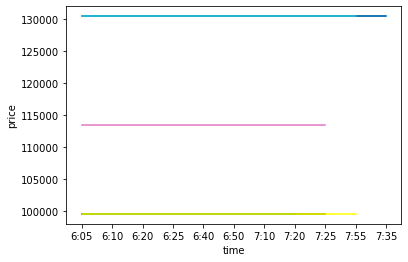

In [ ]:
asia_no_season_normal_all=asia_price_normal[asia_con1].groupby(['start_time','day'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(asia_no_season_normal_all)
asia_nsn_mon=asia_no_season_normal_all[asia_no_season_normal_all['day']=="월요일"]
asia_nsn_tue=asia_no_season_normal_all[asia_no_season_normal_all['day']=="화요일"]
asia_nsn_wed=asia_no_season_normal_all[asia_no_season_normal_all['day']=="수요일"]
asia_nsn_thr=asia_no_season_normal_all[asia_no_season_normal_all['day']=="목요일"]
asia_nsn_fri=asia_no_season_normal_all[asia_no_season_normal_all['day']=="금요일"]
asia_nsn_sat=asia_no_season_normal_all[asia_no_season_normal_all['day']=="토요일"]
asia_nsn_sun=asia_no_season_normal_all[asia_no_season_normal_all['day']=="일요일"]
import matplotlib.pyplot as plt
import numpy as np
plt.plot(asia_nsn_mon['start_time'],asia_nsn_mon['price_mean'],color="red")
plt.plot(asia_nsn_tue['start_time'],asia_nsn_tue['price_mean'], color="blue")
plt.plot(asia_nsn_wed['start_time'],asia_nsn_wed['price_mean'], color="green")
plt.plot(asia_nsn_thr['start_time'],asia_nsn_thr['price_mean'], color="yellow")
plt.plot(asia_nsn_fri['start_time'],asia_nsn_fri['price_mean'], color="#1f77b4")
plt.plot(asia_nsn_sat['start_time'],asia_nsn_sat['price_mean'], color="#17becf")
plt.plot(asia_nsn_sun['start_time'],asia_nsn_sun['price_mean'], color="#e377c2")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

일반의 경우 시간에 따른 가격이 차이가 없음을 알 수 있다.
따라서, 시간에 따라 묶는것은 무의미하다.
일반석의 경우 시간에 따라 가격이 변한다고 할 수 없다.
일반석의 경우 요일에 따라 가격이 변한다고 말 할 수 있다.

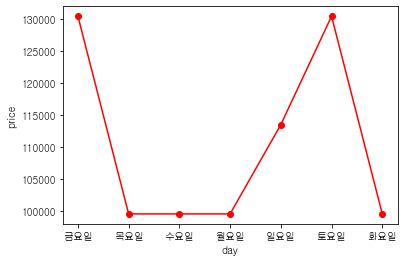

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
asia_nsn_all =asia_no_season_normal_all.groupby(['day'])['price_mean'].agg(**{'price_mean':'mean'}).reset_index()
#asia_nsn_all.sort_values(by=['price_mean'],axis=0)
plt.plot(asia_nsn_all['day'],asia_nsn_all['price_mean'],color="red",marker="o")
plt.xlabel("day")
plt.ylabel("price")
plt.show()

비성수기에는 일반석은 시간에 따라 가격차이가 없으며,
월,화,수,목은 99500원 금,토는 130500원 일요일은 113500원으로 나뉘어진다.


In [ ]:
set_price_asia_airplane['seat_value'].value_counts() #자 이제 좌석의 종류가 무엇이 있나 살펴보자
# 좌석은  아시아나의 경우 일반석, 할인석, 비즈니스석, 특가석 총 4개가 있다.

일반석      1398
할인석      1038
비즈니스석     436
특가석        72
Name: seat_value, dtype: int64

할인석의 경우, 비 성수기는 어떨까?

In [ ]:
asia_price_sale= set_price_asia_airplane[set_price_asia_airplane['seat_value'] =="할인석"]
print(asia_price_sale)
aps_ns=asia_price_sale[asia_price_sale['season']=="비성수기"]
print(aps_ns)

     start_time seat_value  price season  day
0         15:20        할인석  70500    성수기  목요일
21         6:05        할인석  88500    성수기  금요일
26         6:10        할인석  82500    성수기  금요일
29         6:20        할인석  82500    성수기  금요일
43         6:05        할인석  82500    성수기  토요일
...         ...        ...    ...    ...  ...
6305       6:20        할인석  86500   비성수기  목요일
6307       6:50        할인석  86500   비성수기  목요일
6310       7:10        할인석  86500   비성수기  목요일
6314       7:20        할인석  86500   비성수기  목요일
6319       7:35        할인석  86500   비성수기  목요일

[1038 rows x 5 columns]
     start_time seat_value  price season  day
263        6:05        할인석  55500   비성수기  수요일
269        6:10        할인석  55500   비성수기  수요일
275        6:20        할인석  55500   비성수기  수요일
283        6:05        할인석  55500   비성수기  목요일
288        6:10        할인석  55500   비성수기  목요일
...         ...        ...    ...    ...  ...
6305       6:20        할인석  86500   비성수기  목요일
6307       6:50        할인석  86500   비성수기  목요일
6310     

아시아나 항공기의 비 성수기때 할인석의 가격을 요일별로 알아보겠다.

In [ ]:
aps_ns_mon = aps_ns[aps_ns['day']=="월요일"]
aps_ns_tue = aps_ns[aps_ns['day']=="화요일"]
aps_ns_wed = aps_ns[aps_ns['day']=="수요일"]
aps_ns_thr = aps_ns[aps_ns['day']=="목요일"]
aps_ns_fri = aps_ns[aps_ns['day']=="금요일"]
aps_ns_sat = aps_ns[aps_ns['day']=="토요일"]
aps_ns_sun = aps_ns[aps_ns['day']=="일요일"]
print(aps_ns_mon)
print(aps_ns_mon['price'].mean())
print(aps_ns_tue)
print(aps_ns_tue['price'].mean())
print(aps_ns_wed)
print(aps_ns_wed['price'].mean())
print(aps_ns_thr)
print(aps_ns_thr['price'].mean())
print(aps_ns_fri)
print(aps_ns_fri['price'].mean())
print(aps_ns_sat)
print(aps_ns_sat['price'].mean())
print(aps_ns_sun)
print(aps_ns_sun['price'].mean())

#plt.plot(aps_ns_mon['start_time'],aps_ns_mon['price'],color="red")
#plt.plot(aps_ns_tue['start_time'],aps_ns_tue['price'], color="blue")
#plt.plot(aps_ns_wed['start_time'],aps_ns_wed['price'], color="green")
#plt.plot(aps_ns_thr['start_time'],aps_ns_thr['price'], color="yellow")
#plt.plot(aps_ns_fri['start_time'],aps_ns_fri['price'], color="#1f77b4")
#plt.plot(aps_ns_sat['start_time'],aps_ns_sat['price'], color="#17becf")
#plt.plot(aps_ns_sun['start_time'],aps_ns_sun['price'], color="#e377c2")
#plt.xlabel("time")
#plt.ylabel("price")
#plt.show()

     start_time seat_value  price season  day
363        6:05        할인석  55500   비성수기  월요일
374        6:20        할인석  55500   비성수기  월요일
503        6:05        할인석  55500   비성수기  월요일
508        6:10        할인석  55500   비성수기  월요일
515        6:20        할인석  55500   비성수기  월요일
...         ...        ...    ...    ...  ...
6245       6:20        할인석  73500   비성수기  월요일
6247       6:50        할인석  73500   비성수기  월요일
6250       7:10        할인석  73500   비성수기  월요일
6253       7:20        할인석  73500   비성수기  월요일
6259       7:35        할인석  73500   비성수기  월요일

[109 rows x 5 columns]
71591.74311926606
     start_time seat_value  price season  day
381        6:05        할인석  55500   비성수기  화요일
392        6:20        할인석  55500   비성수기  화요일
521        6:05        할인석  55500   비성수기  화요일
526        6:10        할인석  55500   비성수기  화요일
533        6:20        할인석  55500   비성수기  화요일
...         ...        ...    ...    ...  ...
6265       6:20        할인석  64500   비성수기  화요일
6267       6:50        할인석  64500   비성

할인석의 경우에 시간에 따라 차이가 있어 보인다.


In [ ]:
aps_nsn_mon= aps_ns_mon.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_mon)
print(aps_ns_mon[['start_time','price']].value_counts())

  start_time    price_mean
0       6:05  70227.272727
1       6:10  70928.571429
2       6:20  69000.000000
3       6:25  72100.000000
4       6:40  72100.000000
5       6:50  73500.000000
6       7:10  73500.000000
7       7:20  73500.000000
8       7:35  73500.000000
start_time  price
6:05        73500    18
6:10        73500    18
6:20        73500     9
6:25        73500     9
6:40        73500     9
6:50        73500     9
7:10        73500     9
7:20        73500     8
7:35        73500     8
6:05        55500     4
6:10        55500     3
6:20        55500     3
6:25        59500     1
6:40        59500     1
dtype: int64


할인석의 경우 대체적으로 6시 05분에서 ~ 7시 35분까지 73500원에 해당하는 가격으로 판다. 할인석은 시간에 따라 할인 한다고 볼 수가 없을 것 같다.
같은 시간대에 있는 가격이 다르기 때문이다. 이 경우는 항공사에서도 좌석이 판매가 안되는 날짜를 알고 더 할인하여 팔것으로 보여진다.
화,수,목,금,토,일 도 체크해보자.

In [ ]:
aps_nsn_tue= aps_ns_tue.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_tue)
print(aps_ns_tue[['start_time','price']].value_counts())
print("\n")
aps_nsn_wed= aps_ns_wed.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_wed)
print(aps_ns_wed[['start_time','price']].value_counts())
print("\n")
aps_nsn_thr= aps_ns_thr.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_thr)
print(aps_ns_thr[['start_time','price']].value_counts())
print("\n")
aps_nsn_fri= aps_ns_fri.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_fri)
print(aps_ns_fri[['start_time','price']].value_counts())
print("\n")
aps_nsn_sat= aps_ns_sat.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_sat)
print(aps_ns_sat[['start_time','price']].value_counts())
print("\n")
aps_nsn_sun= aps_ns_sun.groupby(['start_time'])['price'].agg(**{'price_mean':'mean'}).reset_index()
print(aps_nsn_sun)
print(aps_ns_sun[['start_time','price']].value_counts())

  start_time    price_mean
0       6:05  72602.564103
1       6:10  73052.631579
2       6:20  62250.000000
3       6:25  77203.703704
4       6:40  78038.461538
5       6:50  64500.000000
6       7:10  64500.000000
7       7:20  64500.000000
8       7:35  64500.000000
start_time  price
6:10        64500    19
6:05        64500    19
            86500    16
6:10        86500    16
6:25        86500    16
6:40        86500    16
6:25        64500    10
6:40        64500    10
7:35        64500     9
6:50        64500     9
7:20        64500     9
7:10        64500     9
6:20        64500     9
6:05        55500     4
6:20        55500     3
6:10        55500     3
6:25        55500     1
dtype: int64


  start_time    price_mean
0       6:05  71526.315789
1       6:10  71851.351351
2       6:20  62038.461538
3       6:25  76041.666667
4       6:40  76023.809524
5       6:50  64500.000000
6       7:10  64500.000000
7       7:20  64500.000000
8       7:35  64500.000000
start_time  price
6

동일한 시간대에 다른 가격량이 있는것으로 보아, 많이 덜팔리는날, 조금 덜 팔리는 날을 구분하여, 같은 시간대지만 가격이 다르다고 가정하겠다.
그렇다면, mean()을 통하여 월,화,수,목,금,토,일의 mean()을 비교해본 결과를 체크해보자.

In [ ]:
print(aps_ns) #월~일 값을 담고있는 비성수기 할인석
aps_ns_day=aps_ns.groupby(['day'])['price'].agg(**{'price_mean':'mean','price_cnt':'count'}).reset_index() 
print(aps_ns_day)

     start_time seat_value  price season  day
263        6:05        할인석  55500   비성수기  수요일
269        6:10        할인석  55500   비성수기  수요일
275        6:20        할인석  55500   비성수기  수요일
283        6:05        할인석  55500   비성수기  목요일
288        6:10        할인석  55500   비성수기  목요일
...         ...        ...    ...    ...  ...
6305       6:20        할인석  86500   비성수기  목요일
6307       6:50        할인석  86500   비성수기  목요일
6310       7:10        할인석  86500   비성수기  목요일
6314       7:20        할인석  86500   비성수기  목요일
6319       7:35        할인석  86500   비성수기  목요일

[988 rows x 5 columns]
   day     price_mean  price_cnt
0  금요일  109561.224490         98
1  목요일   84155.172414        174
2  수요일   70680.722892        166
3  월요일   71591.743119        109
4  일요일   94137.500000        160
5  토요일  109820.388350        103
6  화요일   71853.932584        178


비성수기 할인석의 경우, 일반석과 같이 요일에 따른 가격이 다르다. 월요일, 화요일, 수요일이 비슷한 가격을 가지며
목요일< 일요일<금요일,토요일 순이다.
비성수기 할인석의 경우에 비성수기 일반석과 달리 목요일이 평일에 비해 가격이 비싸다.


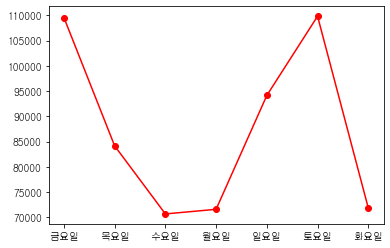

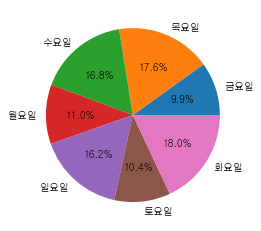

In [ ]:
plt.plot(aps_ns_day['day'],aps_ns_day['price_mean'],color="red",marker="o")
plt.show()
plt.pie(aps_ns_day['price_cnt'],labels=aps_ns_day['day'], autopct='%.1f%%' )
plt.show()

In [ ]:
#print(name_time_seat)
#sex_salary = df.groupby('airplane_name')['price'].agg(**{'price_mean':'mean','price_median':'median'}).reset_index() ## 성별 월급

In [ ]:
#print(name_time_seat[name_time_seat['airplane_name'] == "대한항공"])
#con1 = name_time_seat['airplane_name'] == "대한항공"
#con2 = name_time_seat['seat_value'] =="일반석"
#print(name_time_seat[con1&con2])

## 숙박 비수기, 성수기 가격 비교

In [ ]:
지영

## 렌터카 비수기, 성수기 가격 비교

### 롯데 렌터카 크롤링

[렌터카업체 '롯데렌터카' 선정 근거 기사]
https://my.tarrte.com/96
렌터카업체 점유율 1위

[렌터카 차종 '아반떼' 선정 근거 기사]
https://www.joongang.co.kr/article/22823828#home
렌터카 최고 인기 차종은 '아반떼'

[렌트 기간 '2일' 선정 근거 기사]
https://www.mk.co.kr/news/business/view/2020/10/1070418/
렌터카의 평균 단기 렌트 기간은 '2.4일'
정확한 날짜 구분을 위해 당일 오전 9시 ~ 다음날 오후 6시(1박 2일)로 설정

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import requests
from bs4 import BeautifulSoup
import psycopg2

C:\Users\trap1\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
url = 'https://lotterentacar.net/hp/kor/reservation/step1.do?state=2&rentArea=1'
driver = webdriver.Chrome()

    
#------------ 2월~3월의 크롤링 함수 정의----------------

def crawling(start, end):
    for i in range(start, end):

        driver.maximize_window()  # 브라우저 화면 최대화
        driver.get(url)
        time.sleep(3)

        # 제주 지역 클릭

        short_branch = driver.find_elements(By.CLASS_NAME, 'short-branch')

        tab_cont = short_branch[1].find_elements(By.CLASS_NAME, 'tab-cont')

        sameArea = tab_cont[0].find_elements(By.CLASS_NAME, 'sameAreaLi')

        label = sameArea[1] .find_element(By.CLASS_NAME, 'sameAreaFlag-label')

        label.click()
        time.sleep(1)


        # 롯데호텔(중문) 클릭

        br_item = driver.find_elements(By.CLASS_NAME, 'shor-main-list-rt')

        sameBranchItem = br_item[3].find_elements(By.CLASS_NAME, 'sameBranchItem')

        btn = sameBranchItem[0].find_elements(By.CLASS_NAME, 'btn')

        btn[0].click()
        time.sleep(1)


        # 뜨는 팝업창 닫기

        close = driver.find_elements(By.CLASS_NAME, 'layer-popup-close')

        close[8].click()
        time.sleep(1)

        # ----------------- 날짜설정 ------------------------

        # 렌트 시작 날짜 클릭 (날짜 for문으로 변수 지정)

        start_day = driver.find_elements(By.ID, f'{i}')

        start_day[0].click()
        time.sleep(1)


        # 렌트 종료 날짜 클릭 (날짜 for문으로 변수 지정)
        
        end_day = driver.find_elements(By.ID, f'{i+1}')

        end_day[0].click()
        time.sleep(1)

        # ----------------- 시간 설정 ------------------------

        # 렌트 시작 시간 클릭

        selectbox = driver.find_elements(By.CLASS_NAME, 'selectbox')

        selectbox[4].find_element_by_xpath("//*[@id=\"sHour-2\"]/option[11]").click()
        time.sleep(1)


        # 렌트 종료 시간 클릭

        selectbox[6].find_element_by_xpath("//*[@id=\"eHour-2\"]/option[20]").click()
        time.sleep(1)


        # ----------------- 소형차 클릭 ------------------------

        chk_box = driver.find_elements(By.CLASS_NAME, 'chk-box')

        chk_box[11].click()
        time.sleep(3)


        # ----------------- 차 정보 리스트에 추가 ------------------------

        # 차 이름

        short_car_list_cont = driver.find_elements(By.CLASS_NAME, 'short-car-list-cont')

        txt_type = short_car_list_cont[0].find_elements(By.CLASS_NAME, 'txt-type')

        carname = txt_type[1].find_elements_by_xpath("//strong")


        # 차 가격

        carprice = driver.find_elements(By.CLASS_NAME, 'txt-red')


        # 차 이름 리스트에 값 추가

        carname_list.append(carname[2].text)
        carname_list.append(carname[3].text)
        carname_list.append(carname[4].text)


        # 차 가격 리스트에 값 추가

        carprice = driver.find_elements(By.CLASS_NAME, 'txt-red')

        carprice_list.append(carprice[2].text.split('(')[0])
        carprice_list.append(carprice[3].text.split('(')[0])
        carprice_list.append(carprice[4].text.split('(')[0])


        # 렌트 시작일 리스트에 값 추가

        rent_start_list.append(carname[5].text)
        rent_start_list.append(carname[5].text)
        rent_start_list.append(carname[5].text)


        # 렌트 종료일 리스트에 값 추가

        rent_end_list.append(carname[6].text)
        rent_end_list.append(carname[6].text)
        rent_end_list.append(carname[6].text)

        print(len(carname_list))
        print(len(carprice_list))
        print(len(rent_start_list))
        print(len(rent_end_list))

In [ ]:
# 2월 렌트카 가격 크롤링

carname_list = []
carprice_list=[]
rent_start_list = []
rent_end_list = []

crawling(20220218, 20220228)

C:\Users\trap1\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:393: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\trap1\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:426: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


3
3
3
3
6
6
6
6
9
9
9
9
12
12
12
12
15
15
15
15
18
18
18
18
21
21
21
21
24
24
24
24
27
27
27
27
30
30
30
30


In [ ]:
# 3월 렌트카 가격 크롤링

crawling(20220301, 20220331)

33
33
33
33
36
36
36
36
39
39
39
39
42
42
42
42
45
45
45
45
48
48
48
48
51
51
51
51
54
54
54
54
57
57
57
57
60
60
60
60
63
63
63
63
66
66
66
66
69
69
69
69
72
72
72
72
75
75
75
75
78
78
78
78
81
81
81
81
84
84
84
84
87
87
87
87
90
90
90
90
93
93
93
93
96
96
96
96
99
99
99
99
102
102
102
102
105
105
105
105
108
108
108
108
111
111
111
111
114
114
114
114
117
117
117
117
120
120
120
120


In [ ]:
#------------ 4월~5월의 크롤링 험수 (달력 페이지 스크롤 추가) ----------------


def crawling_4(start, end):
    for i in range(start, end):

        driver.maximize_window()  # 브라우저 화면 최대화
        driver.get(url)
        time.sleep(3)

        # 제주 지역 클릭

        short_branch = driver.find_elements(By.CLASS_NAME, 'short-branch')

        tab_cont = short_branch[1].find_elements(By.CLASS_NAME, 'tab-cont')

        sameArea = tab_cont[0].find_elements(By.CLASS_NAME, 'sameAreaLi')

        label = sameArea[1] .find_element(By.CLASS_NAME, 'sameAreaFlag-label')

        label.click()
        time.sleep(1)


        # 롯데호텔(중문) 클릭

        br_item = driver.find_elements(By.CLASS_NAME, 'shor-main-list-rt')

        sameBranchItem = br_item[3].find_elements(By.CLASS_NAME, 'sameBranchItem')

        btn = sameBranchItem[0].find_elements(By.CLASS_NAME, 'btn')

        btn[0].click()
        time.sleep(1)


        # 뜨는 팝업창 닫기

        close = driver.find_elements(By.CLASS_NAME, 'layer-popup-close')

        close[8].click()
        time.sleep(1)

        # ----------------- 날짜설정 ------------------------

        # 렌트 시작 날짜 클릭 (날짜 for문으로 변수 지정)
        
        
        driver.find_elements(By.ID, 20220331)[0].click()
        time.sleep(1)
        
        driver.find_elements(By.ID, 20220331)[0].click()
        time.sleep(2)
        
        driver.find_elements(By.ID, 20220331)[0].click()
        time.sleep(1)
        
        start_day = driver.find_elements(By.ID, f'{i}')

        start_day[0].click()
        time.sleep(1)


        # 렌트 종료 날짜 클릭 (날짜 for문으로 변수 지정)
        
        end_day = driver.find_elements(By.ID, f'{i+1}')

        end_day[0].click()
        time.sleep(1)

        # ----------------- 시간 설정 ------------------------

        # 렌트 시작 시간 클릭

        selectbox = driver.find_elements(By.CLASS_NAME, 'selectbox')

        selectbox[4].find_element_by_xpath("//*[@id=\"sHour-2\"]/option[11]").click()
        time.sleep(1)


        # 렌트 종료 시간 클릭

        selectbox[6].find_element_by_xpath("//*[@id=\"eHour-2\"]/option[20]").click()
        time.sleep(1)


        # ----------------- 소형차 클릭 ------------------------

        chk_box = driver.find_elements(By.CLASS_NAME, 'chk-box')

        chk_box[11].click()
        time.sleep(3)


        # ----------------- 차 정보 리스트에 추가 ------------------------

        # 차 이름

        short_car_list_cont = driver.find_elements(By.CLASS_NAME, 'short-car-list-cont')

        txt_type = short_car_list_cont[0].find_elements(By.CLASS_NAME, 'txt-type')

        carname = txt_type[1].find_elements_by_xpath("//strong")


        # 차 가격

        carprice = driver.find_elements(By.CLASS_NAME, 'txt-red')


        # 차 이름 리스트에 값 추가

        carname_list.append(carname[2].text)
        carname_list.append(carname[3].text)
        carname_list.append(carname[4].text)


        # 차 가격 리스트에 값 추가

        carprice = driver.find_elements(By.CLASS_NAME, 'txt-red')

        carprice_list.append(carprice[2].text.split('(')[0])
        carprice_list.append(carprice[3].text.split('(')[0])
        carprice_list.append(carprice[4].text.split('(')[0])


        # 렌트 시작일 리스트에 값 추가

        rent_start_list.append(carname[5].text)
        rent_start_list.append(carname[5].text)
        rent_start_list.append(carname[5].text)


        # 렌트 종료일 리스트에 값 추가

        rent_end_list.append(carname[6].text)
        rent_end_list.append(carname[6].text)
        rent_end_list.append(carname[6].text)

        print(len(carname_list))
        print(len(carprice_list))
        print(len(rent_start_list))
        print(len(rent_end_list))

In [ ]:
# 4월 렌트카 가격 크롤링

crawling_4(20220401, 20220430)

144
144
144
144
147
147
147
147
150
150
150
150
153
153
153
153
156
156
156
156
159
159
159
159
162
162
162
162
165
165
165
165
168
168
168
168
171
171
171
171
174
174
174
174
177
177
177
177
180
180
180
180
183
183
183
183
186
186
186
186
189
189
189
189
192
192
192
192


In [ ]:
# 5월 렌트카 가격 크롤링

crawling_4(20220501, 20220518)

In [ ]:
# 리스트로 df 생성

lotterentcar_df = pd.DataFrame({'name': carname_list,
                   'price': carprice_list, 'rent_start': rent_start_list,
                   'rent_end': rent_end_list})

lotterentcar_df

![image.png](attachment:image.png)

In [ ]:
# price 컬럼 전처리

for i in range(258):
    lotterentcar_df.iloc[i, 1] = lotterentcar_df.iloc[i, 1].replace('원', '').replace(',', '')    # 원, 쉼표 제거

lotterentcar_df.iloc[:, 1] = lotterentcar_df.iloc[:, 1].astype('int')    # int로 변환

In [ ]:
# name 컬럼 전처리 - (G)와 수식어 제거

for i in range(258):
    lotterentcar_df.iloc[i, 0] = lotterentcar_df.iloc[i, 0].replace(' (G)', '').replace('올 뉴 ', '').replace('더 뉴 ', '').replace('ALL NEW ', '')

In [ ]:
# rent_start, rent_start 컬럼 전처리

lotterentcar_df['rent_start']= pd.to_datetime(lotterentcar_df['rent_start'])    # datetime으로 변환
lotterentcar_df['rent_end']= pd.to_datetime(lotterentcar_df['rent_end'])    # datetime으로 변환

In [ ]:
# 아반떼 차종 df 추출

avante = lotterentcar_df[lotterentcar_df['name'] == '아반떼']
avante

![image.png](attachment:image.png)

In [ ]:
#그래프용 리스트 생성

avante_price = []
avante_day = []

for i in range(86):
    avante_price.append(avante.iloc[i, 1])    # 렌트비 append
    avante_day.append(avante.iloc[i, 2])     # 날짜 append

In [ ]:
# 월 column 생성

avante['month'] = avante['rent_start'].dt.month

In [ ]:
# 월별 평균 렌트비 df 생성

avante_month = avante.groupby('month')['price'].agg(**{
'price':'mean',
}).reset_index()

avante_month['price'] = round(avante_month['price'])
avante_month

![image.png](attachment:image.png)

In [ ]:
#---------- 한글 폰트 처리 ----------

from matplotlib import font_manager, rc

# font_path = "./한글폰트.ttf" # 폰트 파일 위치

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


#---------- 일별 렌트비 변동 그래프 ----------

plt.rcParams["figure.figsize"] = (18,6)

x_values = avante_day
y_values = avante_price

plt.title('2022년 2~5월 일별 아반떼 렌트비 변동', fontsize = 18)
plt.xlabel('날짜', fontsize = 15)
plt.ylabel('렌트비 (단위 : 원)', fontsize = 15)

plt.plot(x_values, y_values)
plt.show()


#---------- 월별 렌트비 변동 그래프 ----------

x_values1 = avante_month['month']
y_values1 = avante_month['price']

plt.title('2022년 2~5월 월별 아반떼 렌트비 변동', fontsize = 18)
plt.xlabel('월', fontsize = 15)
plt.ylabel('렌트비 (단위 : 원)', fontsize = 15)

plt.plot(x_values1, y_values1)
plt.show()

![image.png](attachment:image.png)

In [ ]:
# 2022년 2월 18일~5월 18일 사이 아반떼 평균 렌트비는 5월에 가장 높고 3월에 가장 낮다.
# 2월에 비해 3월에 아반떼 평균 렌트비가 감소했다가 5월까지 상승한다.

### 제주 공항 렌트카 크롤링

제주도 렌트카 비용 검색을 해보자.
https://www.airportrentcar.co.kr/search/searchList?takeOverDay=
    202203010800
    &returnDay=
    202203020800
    &carInsurance=5000200000&carModel=
로 이루어져 있다.
따라서
base_url = https://www.airportrentcar.co.kr/search/searchList?takeOverDay=
year_url = 2022
date_url= 0301
date_plus_url=0800
plus_url1=%returnDay=
plus_url2=%carlnsurance=5000200000&carModel=

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import psycopg2
import pandas as pd


url = "https://www.airportrentcar.co.kr/search/searchList?takeOverDay=202203010800&returnDay=202203020800&carInsurance=5000200000&carModel="
driver = webdriver.Chrome("chromedriver.exe")
driver.get(url)
driver.implicitly_wait(10)
elem = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "car_items_wrap")))
time.sleep(1)


#print(elem.text)

car_item =elem.find_elements(By.CLASS_NAME, "car_item")
time.sleep(1)

for i in range(0, len(car_item)):
    
    car_set = car_item[i].find_element(By.CLASS_NAME, "car_item_tit")
    car_set_root = car_set.find_element(By.TAG_NAME, "span")
    car_btns = car_item[i].find_element(By.CLASS_NAME,"car_btns")
    car_btns_root = car_btns.find_elements(By.CLASS_NAME,"spec")
    car_set_info = car_item[i].find_element(By.CLASS_NAME, "car_rent_lists")
    car_info_root = car_set_info.find_elements(By.CLASS_NAME, "list-row")
    
    for j in range(0, len(car_info_root)):
        
        car_name= car_set_root.text
        car_info_data = car_info_root[j].find_elements(By.CLASS_NAME,"cell")
        rent_name= car_info_data[0].text
        rent_age=car_info_data[1].text
        rent_price=car_info_data[2].text
        rent_sale=car_info_data[3].text
        rent_sp=car_info_data[4].text
        
        print(car__name,car_btns_root[0].text,car_btns_root[1].text,car_btns_root[2].text,car_btns_root[3].text)
        print(rent_name,rent_age,rent_price,rent_sale,rent_sp)

In [ ]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import psycopg2
import pandas as pd


date_set = "2022"
base_url = "https://www.airportrentcar.co.kr/search/searchList?takeOverDay="
plus_url1 = "&returnDay="
plus_url2 = "&carlnsurance=5000200000&carModel="
plus_time = "0900"


##

conn_str = "host=localhost dbname=postgres user=postgres password=admin port=5432"
conn = psycopg2.connect(conn_str)

month_length = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
total_length= sum(month_length)           #달력 총 일수
focus_cursor_month=2
focus_cursor_day=17
focus_cursor_month_2=2
focus_cursor_day_2=18

cur = conn.cursor()
cur.execute('''CREATE TABLE rentcar (number serial, car_name varchar(30), car_value varchar(30), car_max varchar(30), car_fuel varchar(30), car_driver_type varchar(30), rent_name varchar(30),age varchar(30), price varchar(30), sale varchar(30), sale_price varchar(25), Date varchar(30))''') 
conn.commit()

driver = webdriver.Chrome("chromedriver.exe")

for x in range(total_length):
    if len(str(focus_cursor_day)) == 1:
        day="0"+str(focus_cursor_day)
    elif len(str(focus_cursor_day)) == 2:
        day = str(focus_cursor_day)
        
    if len(str(focus_cursor_month)) == 1:
        month="0"+str(focus_cursor_month)
    elif len(str(focus_cursor_month)) == 2:
        month= str(focus_cursor_month)
        
    if month_length[focus_cursor_month-1] != focus_cursor_day:
        focus_cursor_day += 1
    elif month_length[focus_cursor_month-1] == focus_cursor_day:
        focus_cursor_day=1
        focus_cursor_month +=1
    
    
    if len(str(focus_cursor_day_2)) == 1:
        day2="0"+str(focus_cursor_day_2)
    elif len(str(focus_cursor_day_2)) == 2:
        day2 = str(focus_cursor_day_2)
        
    if len(str(focus_cursor_month_2)) == 1:
        month2="0"+str(focus_cursor_month_2)
    elif len(str(focus_cursor_month_2)) == 2:
        month2= str(focus_cursor_month_2)
        
    if month_length[focus_cursor_month-1] != focus_cursor_day_2:
        focus_cursor_day_2 += 1
    elif month_length[focus_cursor_month_2-1] == focus_cursor_day_2:
        focus_cursor_day_2=1
        focus_cursor_month_2 +=1
        
    check_date= date_set+month+day
    date_url1 = date_set+month+day+plus_time
    date_url2 = date_set+month2+day2+plus_time
    url =base_url + date_url1 + plus_url1 +date_url2 + plus_url2
    
    driver.get(url)
    driver.implicitly_wait(10)
    elem = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "car_items_wrap")))
    time.sleep(1)
    
    car_item =elem.find_elements(By.CLASS_NAME, "car_item")
    time.sleep(1)
    
    for i in range(0, len(car_item)):
        
        car_set = car_item[i].find_element(By.CLASS_NAME, "car_item_tit")
        car_set_root = car_set.find_element(By.TAG_NAME, "span")
        car_btns = car_item[i].find_element(By.CLASS_NAME,"car_btns")
        car_btns_root = car_btns.find_elements(By.CLASS_NAME,"spec")
        car_set_info = car_item[i].find_element(By.CLASS_NAME, "car_rent_lists")
        car_info_root = car_set_info.find_elements(By.CLASS_NAME, "list-row")
        
        for j in range(0, len(car_info_root)):
            
            car_name= car_set_root.text
            car_info_data = car_info_root[j].find_elements(By.CLASS_NAME,"cell")
            rent_name= car_info_data[0].text
            rent_age=car_info_data[1].text
            rent_price=car_info_data[2].text
            rent_sale=car_info_data[3].text
            rent_sp=car_info_data[4].text
            
            print(car_name,car_btns_root[0].text,car_btns_root[1].text,car_btns_root[2].text,car_btns_root[3].text)
            print(rent_name,rent_age,rent_price,rent_sale,rent_sp)
            
            cur.execute("INSERT INTO rentcar (car_name,car_value,car_max,car_fuel,car_driver_type,rent_name, age,price,sale,sale_price,Date) VALUES (%s, %s,%s ,%s, %s, %s, %s, %s,%s, %s, %s);",(car_name,car_btns_root[0].text,car_btns_root[1].text,car_btns_root[2].text,car_btns_root[3].text,rent_name,rent_age,rent_price,rent_sale,rent_sp,check_date))
            conn.commit()

![KakaoTalk_20220218_161440876_01.png](attachment:KakaoTalk_20220218_161440876_01.png)

![KakaoTalk_20220218_161440876.png](attachment:KakaoTalk_20220218_161440876.png)